# QCTO - Workplace Module

### Project Title: Insurance claim project
#### Done By: Vuyani Dlamini

© ExploreAI 2024

---

<h1 style="text-align: center; padding: 20px; background-color: #B0E0E6; color: #000000;">Insurance Claim Fraud Detection</h1>

### Project Description:

Insurance fraud poses a significant challenge in the auto insurance industry, demanding effective solutions for identification and prevention. Leveraging machine learning, this project aims to develop a predictive model to discern whether an insurance claim is fraudulent or not. The provided dataset contains comprehensive information, including details about insurance policies, customer profiles, and accident specifics, forming the basis for creating a robust fraud detection system.


### Project Goal:

The goal is to create a machine learning model that can predict whether a given auto insurance claim is fraudulent or not. By analyzing the diverse set of independent variables provided in the dataset, the model aims to identify patterns indicative of potential fraud. This predictive capability can empower insurance companies to proactively detect and investigate suspicious claims, ultimately minimizing financial losses and maintaining the integrity of the insurance industry.



# Table of Contents

* <a href=#BC>1. Project Overview</a>
    * [1.1 Introduction](#section_1_1)
        * [1.1.1 Problem Statement and Importance of the Study](#sub_section_1_1_1)
        * [1.1.2 Key Questions](#sub_section_1_1_2)
        * [1.1.3 Study Objectives](#sub_section_1_1_3)
        * [1.1.4 Data source](#sub_section_1_1_4)
* <a href=#one>2. Importing Packages</a>
* <a href=#two>3. Data Collection and Description</a>
* <a href=#three>4. Loading Data </a>
* <a href=#four>5. Data Cleaning and Filtering</a>
* <a href=#five>6. Exploratory Data Analysis (EDA)</a>
* <a href=#six>7. Modeling </a>
* <a href=#seven>8. Evaluation and Validation</a>
* <a href=#eight>9. Final Model</a>
* <a href=#nine>10. Conclusion and Future Work</a>
* <a href=#ten>11. References</a>

<h1 style="text-align: center; padding: 20px; background-color: #8C3A50; color: #ffffff;">1. Project Overview </h1>



### 1.1. Introduction <a class="anchor" id="section_1_1"></a>

### 1.1.1. Problem Statement and Importance of the Study <a class="anchor" id="sub_section_1_1_1"></a>
The insurance industry faces challenges in accurately predicting fraudulent claims due to the complex interplay of customer demographics, policy details, incident characteristics, and claim specifics. Factors such as customer age, gender, education, occupation, the duration of their relationship with the insurer, and incident details like severity, location, and the number of vehicles involved may influence fraud risk. Additionally, financial indicators like capital gains or losses, along with claim amounts and police involvement, further contribute to identifying fraud. This project aims to analyze these variables and their correlations with fraud, providing insights that can help insurance companies improve fraud detection, optimize pricing strategies, and enhance overall claim.

The goal of this project is to develop a predictive model that can accurately assess the risk of insurance fraud based on various features related to customers, their policies, and the details of the reported incidents.

### 1.1.2. Key Questions to Explore <a class="anchor" id="sub_section_1_1_1"></a>

In this study we aim to address the following key questions:

**(a) How does the duration of the customer’s relationship with the insurer affect the likelihood of fraud?**
We aim to determine if longer customer relationships reduce or increase the risk of fraudulent claims.

**(b) How does age relate to the likelihood of fraud?**
We seek to understand if certain age groups are more prone to committing fraud, or if age impacts claim behavior.

**(c) Does the policy's coverage or premium amount influence the risk of fraud?**
We want to identify whether higher coverage limits, premiums, or deductibles correlate with higher fraud risk.

**(d) How does the type of incident (e.g., collision, theft) affect fraud risk?**
We want to explore if certain types of incidents are more commonly associated with fraudulent claims.

**(e) How does incident severity or the number of vehicles involved influence fraud risk?**
We aim to assess whether more severe incidents or multi-vehicle accidents are more likely to involve fraud.

**(f) How does the amount requested in a claim relate to fraud risk?**
We aim to identify whether higher claim amounts (for property, vehicle, or injury) correlate with an increased likelihood of fraud.

**(g) How do customer characteristics, like education or occupation, relate to fraud?**
We aim to determine if factors like education level or occupation increase the likelihood of fraud.

**(h) Is fraud more common in specific states or cities?**
We seek to analyze whether geographical location has an impact on fraud frequency.

### 1.1.3. Study Objectives <a class="anchor" id="sub_section_1_1_1"></a>

The objectives for this project are:

- To Format and Clean the Data: Clean the dataset by handling missing, incorrect, or outlier values in the customer, policy, incident, claim, and vehicle data.
  
- To Perform Exploratory Data Analysis: Analyze customer and policy characteristics (e.g., age, education level, policy details) to identify patterns related to fraud risk.

- To Provide Insights: Provide insights into the most important features for predicting fraudulent claims, including customer profile, incident characteristics, and vehicle details.

- Suggest how predictive models can be implemented in real-world insurance workflows to enhance fraud prevention strategies.

### 1.1.4. Data Source <a class="anchor" id="sub_section_1_1_1"></a>


The dataset, retrieved from Kaggle : insurance_claims (1).csv(266.96 kB)




<a href=#cont>Back to Table of Contents</a>


<h1 style="text-align: center; padding: 20px; background-color: #8C3A50; color: #ffffff;">2. Importing Packages </h1>

In [1]:
# Libraries for data loading, manipulation and analysis
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import random
import sqlite3


# Libraries for data training and split functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Displays output inline
%matplotlib inline

# Libraries for Handling Errors
import warnings
warnings.filterwarnings('ignore')

### 2.1. Cloning the repository

<a href=#cont>Back to Table of Contents</a>

 Git clone: https://github.com/Vuyanimarvin/Work-place-Case-study.git

### 2.2. Data Loading

A public repository was created and the dataset was uploaded ensuring that it is stored safe in a shared environment where publich contributors can add or extract value out of it. https://github.com/Vuyanimarvin/Work-place-Case-study.git is the name of repository where this dataset is stored.

In [2]:
def load_data(DATA_PATH):
    data = pd.read_csv(DATA_PATH)
    return data

file_path = r'C:\Users\vuyani_dlamini\OneDrive - Aspen Holdings\Documents\Work-place-Case-study\insurance_claims_raw.csv'
df= load_data(file_path)



### 2.3. Checking data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          998 non-null    float64
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            998 non-null    float64
 7   policy_annual_premium        997 non-null    float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      999 non-null    object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### `Observations:`
* Our dataframe comprises 1000 rows and 40 columns.
* Columns which we have in our dataframe and their meaning are mentioned below:
|#   | Variable | Description |
|:--- |:----------|:--------------------------|
| 1   | months_as_customer              | Number of months of patronage                                                                         |
| 2   | age                             | The length of time a customer has lived or a thing has existed                                          |
| 3   | policy_number                   | Unique ID given to the customer to track the subscription status and other details                       |
| 4   | policy_bind_date                | Date of the document given to the customer after accepting the proposal for insurance                    |
| 5   | policy_state                    | Identifies who is insured, what risks or property are covered, policy limits, and the policy period       |
| 6   | policy_csl                      | Combined Single Limit                                                                                 |
| 7   | policy_deductable               | The amount of money that a customer is responsible for paying toward an insured loss                      |
| 8   | policy_annual_premium           | Amount of regular premium payable by the policyholder in a policy year                                   |
| 9   | umbrella_limit                  | Extra insurance that provides protection beyond existing limits and coverages of other policies          |
| 10  | insured_zip                     | Zip code where the insurance was made                                                                 |
| 11  | insured_sex                     | Categories: Male and Female based on reproductive functions                                            |
| 12  | insured_education_level          | Level of education of the customer                                                                    |
| 13  | insured_occupation               | Occupation of the customer                                                                            |
| 14  | insured_hobbies                  | Activity done regularly by the customer in leisure time for pleasure                                    |
| 15  | insured_relationship             | Customer's relationship status: Single, Married, De facto relationship, Civil partnership                |
| 16  | capital-gains                    | Profit accrued due to insurance premium                                                               |
| 17  | capital-loss                     | Losses incurred due to insurance claims                                                               |
| 18  | incident_date                    | Date when claims were made by customers                                                               |
| 19  | incident_type                    | Type of claim/vehicle damage made by the customer                                                     |
| 20  | collision_type                   | Area of damage on the vehicle                                                                         |
| 21  | incident_severity                | Extent/level of damage                                                                                |
| 22  | authorities_contacted            | Government agencies contacted after damage                                                           |
| 23  | incident_state                   | State where the accident happened                                                                    |
| 24  | incident_city                    | City where the accident happened                                                                     |
| 25  | incident_location                | Location where the accident happened                                                                 |
| 26  | incident_hour_of_the_day         | The period of the day when the accident took place                                                    |
| 27  | number_of_vehicles_involved      | Number of vehicles involved in the accident                                                           |
| 28  | property_damage                  | Whether property was damaged or not                                                                   |
| 29  | bodily_injuries                  | Injuries sustained                                                                                   |
| 30  | witnesses                        | Number of witnesses involved                                                                         |
| 31  | police_report_available          | Whether the report on damage was documented or not                                                    |
| 32  | total_claim_amount               | Financial implications involved in claims                                                             |
| 33  | injury_claim                     | Physical injuries sustained                                                                          |
| 34  | property_claim                   | Property damages during the incident                                                                 |
| 35  | vehicle_claim                    | Property damages during the incident                                                                 |
| 36  | auto_make                        | Make of the vehicle                                                                                  |
| 37  | auto_model                       | Model of the vehicle                                                                                 |
| 38  | auto_year                        | Year in which the vehicle was manufactured                                                           |
| 39  | _c39                             | (No description provided) |
| 40  | fraud_reported                   | Whether the insurance fraud was reported or not |

* The dataframe contains three datatypes:float64(2), int64(17), object(21)
* Initial inspection shows there are missing values in the column _c39, but further investigation is required.
* Memory Usage: 312.6+ KB

### 2.4. Dimensions of the DataFrame

In [4]:
df.shape

(1000, 40)

### 2.5. View of data structure

In [5]:
# Creating a copy of the dataframe before data cleaning
df_copy = df.copy()
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN



<h1 style="text-align: center; padding: 20px; background-color: #8C3A50; color: #ffffff;">3. Data Collection and Description </h1>

### 3.1. Purpose:

The purpose of the insurance_claims dataset is to provide insights into various factors that influence insurance claims, specifically focusing on the relationship between customer demographics, policy details, incidents, and the resulting claims. The data aims to enable insurance companies, researchers, and policymakers to better understand claim patterns, assess risks, optimize pricing strategies, and detect fraudulent claims. This information can help improve the efficiency of claim processing, enhance customer risk profiling, and refine insurance product offerings.

### 3.2. Details:
The insurance_claims dataset was sourced from Kaggle, specifically from the dataset titled "Insurance Claims" by Nhat Nguyen Tran. This dataset consists of detailed records related to insurance policies, incidents, and claims, offering a comprehensive view of the various factors influencing the insurance claim process.

#### 3.2.1. Sources of the Data:
The data was sourced from Kaggle (https://www.kaggle.com/datasets/nhatnguyentran/insurance-claims), a popular platform for datasets related to machine learning, data analysis, and research.
This dataset is likely derived from real-world insurance claim records but is anonymized and aggregated for the purposes of analysis.

#### 3.2.2. Methods Used for Data Collection:
The data was collected from insurance claims submitted to an insurer. While the exact method of collection is not provided in the dataset description, it is typical for this type of data to be collected through claims processing systems, which may include both manual inputs from claims agents and automated submissions through online platforms.
The dataset might also be scraped from insurance-related APIs or provided as a curated dataset for educational and analytical purposes.

#### 3.2.3. Dataset Overview:
+ Size and Scope: The dataset contains multiple rows (one per claim) and features representing a wide range of factors, such as customer details, policy attributes, incident specifics, claim amounts, and whether fraud was detected.

#### 3.2.4. Types of Data:
+ Numerical Data: Features like `age`, `capital-gains`, `capital-loss`, `policy_annual_premium`, `total_claim_amount`, `injury_claim`, `property_claim`, and `vehicle_claim` are numerical and represent continuous data.

+ Categorical Data: Features like `policy_state`, `insured_sex`, `incident_type`, `incident_severity`, `incident_state`, `incident_city`, `vehicle_make`, and `fraud_reported` are categorical, which provide qualitative information about the claim, customer, and incident.

+ Datetime Data: `policy_bind_date` and `incident_date` are date-time features that indicate when the policy was issued and when the incident occurred.



<h1 style="text-align: center; padding: 20px; background-color: #8C3A50; color: #ffffff;">4. Data Cleaning and Filtering </h1>

### 4.1.Count the number of duplicate rows

In [6]:
#Count the number of duplicate rows
duplicate_count = df_copy.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


### 4.2.Handing missing values

This step ensures the data's completeness and reliability by identifying and resolving gaps or missing values that could affect the accuracy of the EDA and predictions. The first step is checking for null values in the dataset which helps to identify and handle missing data efficiently.

In [7]:
# Check for missing values
print(df.isnull().sum())


months_as_customer                0
age                               2
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 2
policy_annual_premium             3
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           1
insured_occupation                0
insured_hobbies                   2
insured_relationship              0
capital-gains                     2
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            93
incident_state                    2
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

#### 4.2.1. Fill numerical columns with the median value

In [8]:
numerical_columns = ['age', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'total_claim_amount']
df_copy[numerical_columns] = df_copy[numerical_columns].apply(lambda x: x.fillna(x.median()))


#### 4.2.2. Fill categorical columns with the mode value

In [9]:
categorical_columns = ['insured_education_level', 'insured_hobbies', 'incident_state', 'incident_city']
df_copy[categorical_columns] = df_copy[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))



#### 4.2.3. Drop the column with too many missing values

In [10]:
df_copy.drop(columns=['_c39'], inplace=True)


#### 4.2.4. fill other categorical columns with a placeholder 

In [11]:

df_copy['authorities_contacted'].fillna('Unknown', inplace=True)
df_copy['injury_claim'].fillna(df_copy['injury_claim'].mode()[0], inplace=True)

In [12]:
# Inspect the cleaned data
print(df_copy.isnull().sum())

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

#### 4.2.5. Creating a new DataFrame as df_copy is modified

In [13]:

df_new = df_copy.copy()

# Fill missing value in 'property_claim' with its mode (most frequent value)
df_new['property_claim'].fillna(df_new['property_claim'].mode()[0], inplace=True)

# Now df_new contains the cleaned data without missing values in 'property_claim'



In [14]:
# Assign df_new to df_cleaned (copy of the cleaned data)
df_cleaned = df_new.copy()

# Display the first 5 rows of df_cleaned
df_cleaned.head(5)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,2,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,0,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,3,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,2,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,1,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N


In [15]:
# Inspect the cleaned data
print(df_cleaned.isnull().sum())

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [16]:
print(df_cleaned.isna().any().any())


False


### 4.3. Removing outliers

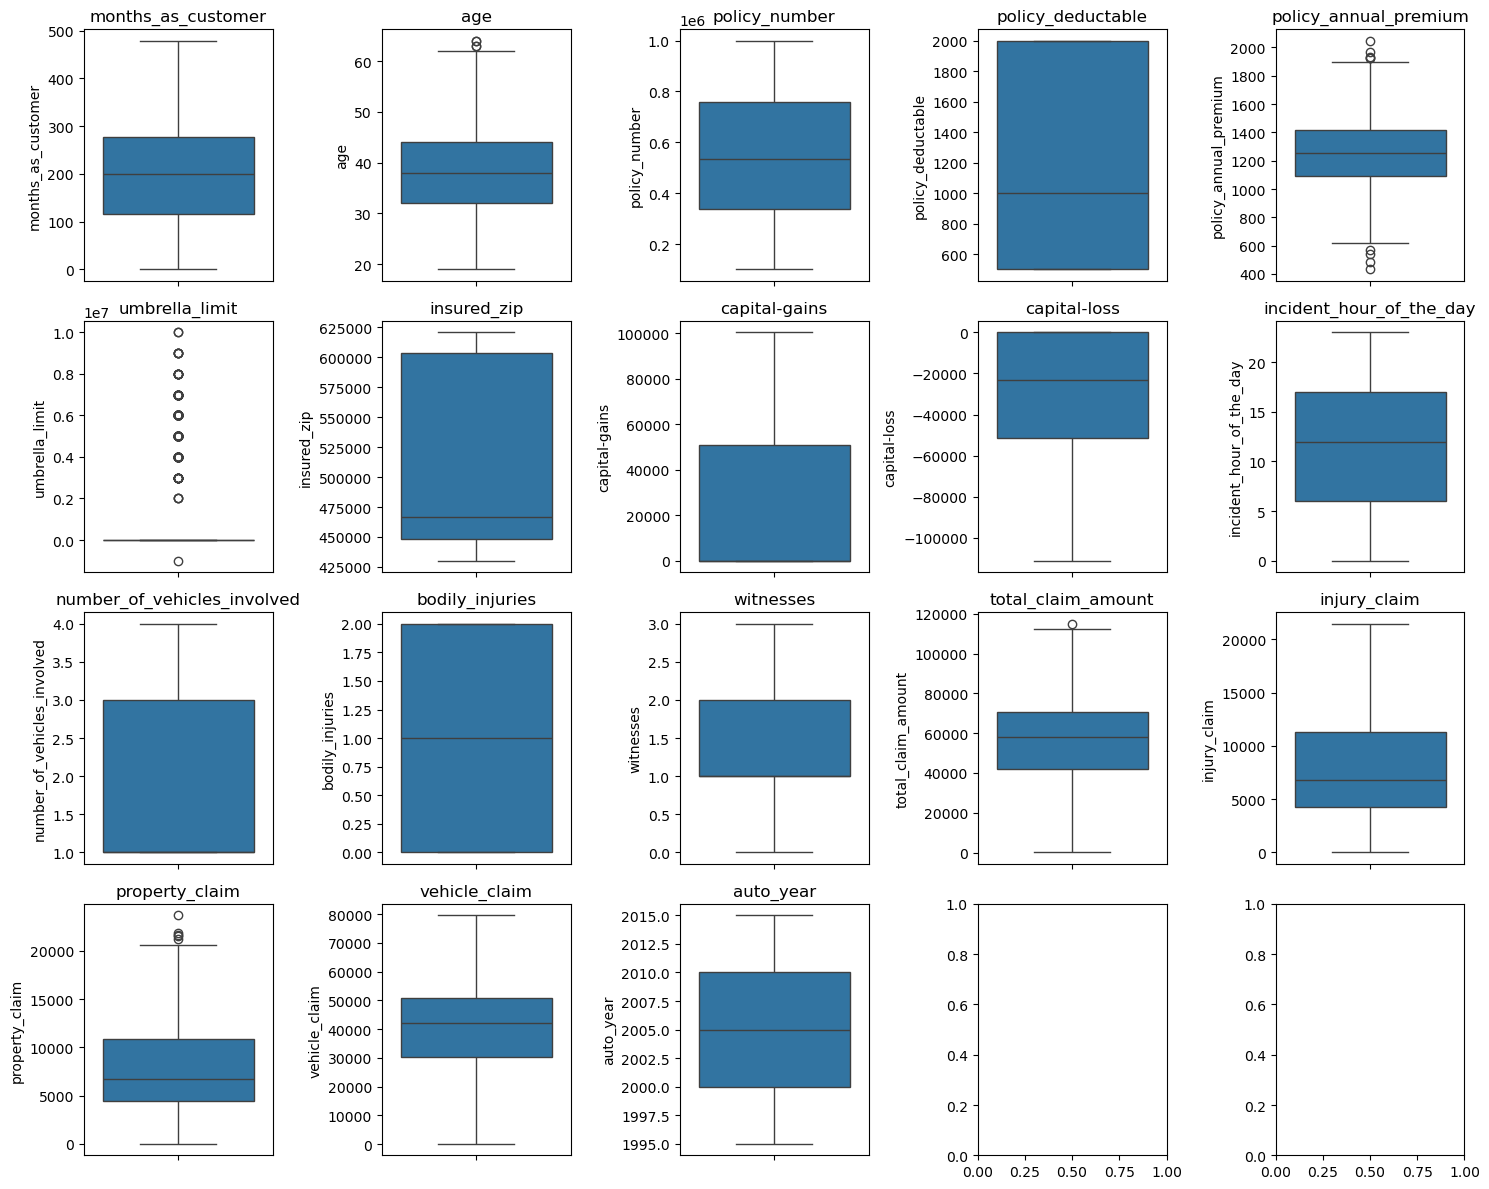

In [17]:
# Assuming df_cleaned is DataFrame with numeric columns
numeric_columns = df_cleaned.select_dtypes(include='number').columns

# Determine the number of rows and columns for the subplot grid
n_cols = 5  # You can adjust this based on your preference
n_rows = int(len(numeric_columns) / n_cols) + (len(numeric_columns) % n_cols > 0)

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot a boxplot for each numeric column
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df_cleaned, y=col, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [18]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numeric column
Q1 = df_cleaned[numeric_columns].quantile(0.25)
Q3 = df_cleaned[numeric_columns].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where any value in the numeric columns is outside the lower and upper bounds
df_cleaned_no_outliers = df_cleaned[~((df_cleaned[numeric_columns] < lower_bound) | (df_cleaned[numeric_columns] > upper_bound)).any(axis=1)]

# Verify the shape of the DataFrame after removing outliers
print(f"Original DataFrame shape: {df_cleaned.shape}")
print(f"DataFrame shape after removing outliers: {df_cleaned_no_outliers.shape}")


Original DataFrame shape: (1000, 39)
DataFrame shape after removing outliers: (783, 39)


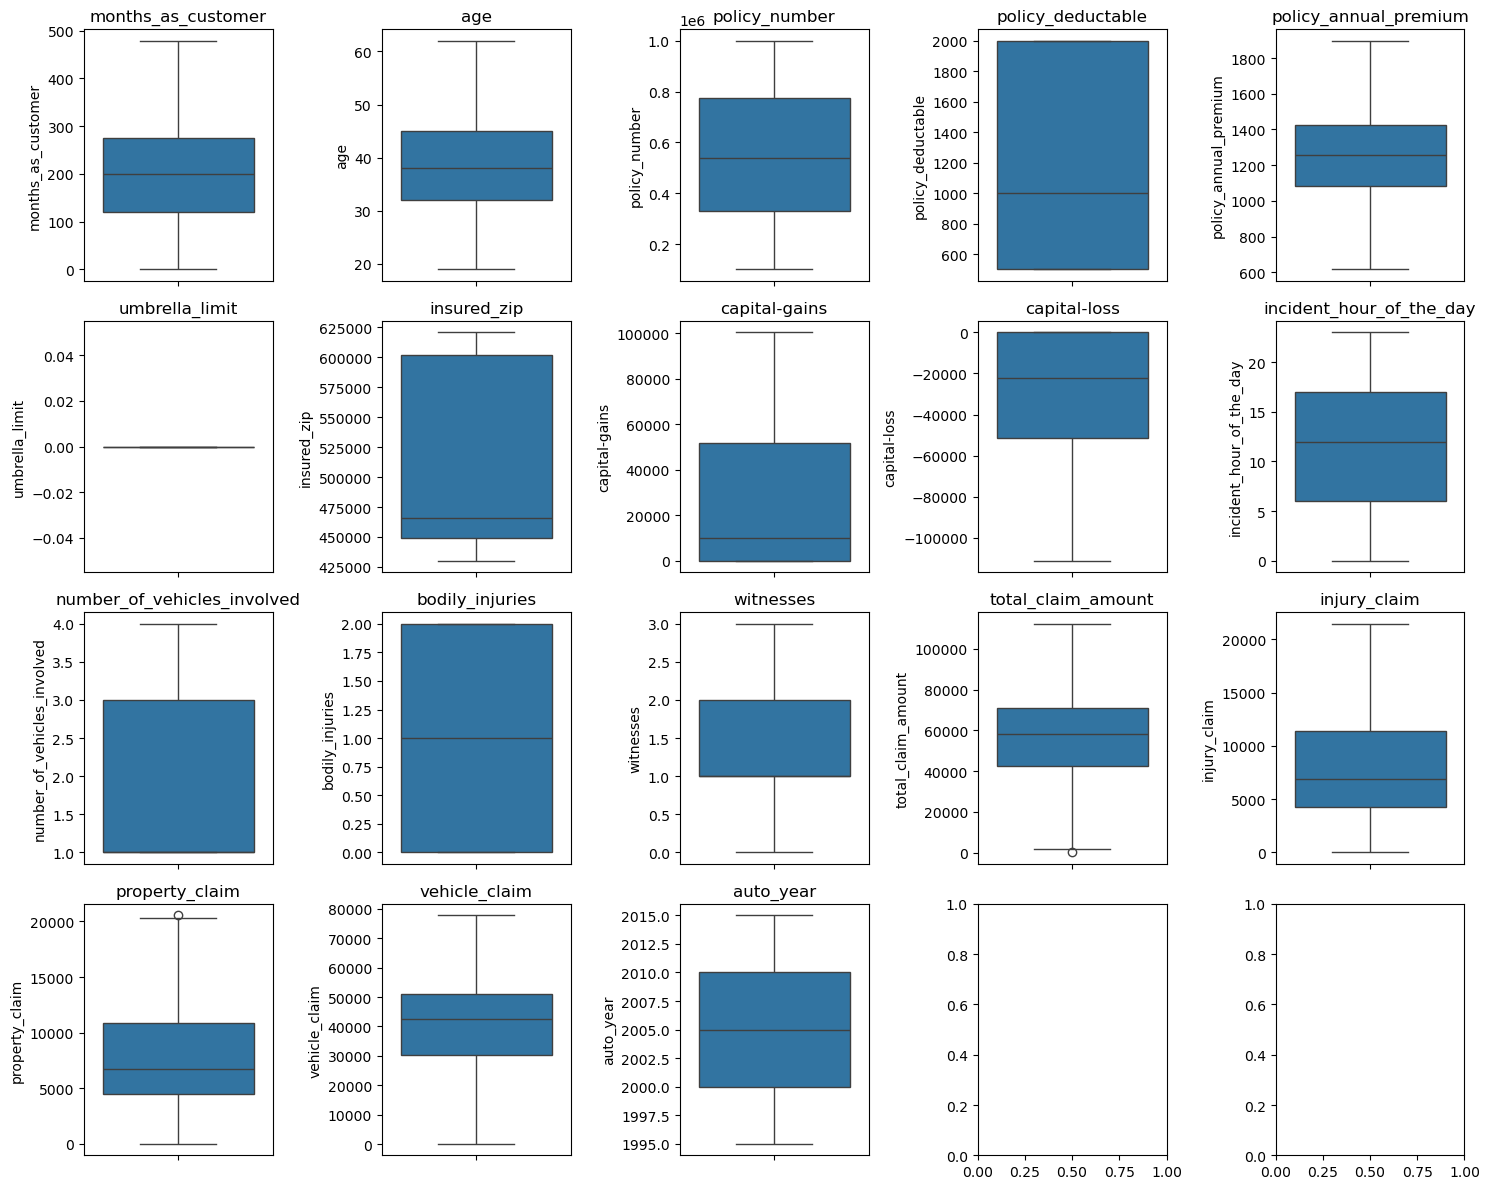

In [19]:

numeric_columns = df_cleaned_no_outliers.select_dtypes(include='number').columns

# Determine the number of rows and columns for the subplot grid
n_cols = 5  # Adjust based on your preference
n_rows = int(len(numeric_columns) / n_cols) + (len(numeric_columns) % n_cols > 0)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot a boxplot for each numeric column
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df_cleaned_no_outliers, y=col, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


> After removing the outliers the `umbrella limit` column only contains values of 0, therefore we will drop this variable as it does not contain valuable information to help us achieve our aims.

---
<a href=#five></a>
<h1 style="text-align: center; padding: 20px; background-color: #8C3A50; color: #ffffff;">5. Exploratory Data Analysis (EDA) </h1>

<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


### 5.1 Descriptive statistics 
Investigating the data distribution and patterns to identify the primary sources of CO2 emissions within the agri-food sector.

In [20]:
df_cleaned.drop(columns=['policy_bind_date', 'policy_number', 'insured_zip', 'incident_hour_of_the_day']).describe()





,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.961000,1134.000000,1257.003600,1.101000e+06,25126.100000,-26793.700000,1.83900,0.992000,1.487000,52788.140000,7427.510000,7391.230000,37928.950000,2005.103000
std,115.113174,9.126378,610.669237,243.898015,2.297407e+06,27872.187708,28104.096686,1.01888,0.820127,1.111335,26354.451927,4886.373291,4830.303947,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,1.00000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1090.567500,0.000000e+00,0.000000,-51500.000000,1.00000,0.000000,1.000000,41962.500000,4277.500000,4427.500000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.830000,0.000000e+00,0.000000,-23250.000000,1.00000,1.000000,1.000000,57935.000000,6775.000000,6745.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,3.00000,2.000000,2.000000,70532.500000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,4.00000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


**Insights for Descriptive Statistics**

* Age Distribution: Customers range from 19 to 64 years old, with most in the 30-44 age group.
* Policy Premiums & Deductibles: Most customers have a premium close to the average ($1257) and low deductibles (500-1000.
* Capital Gains and Losses: A small portion of customers have significant capital gains or losses, but the majority report modest or zero amounts.
* Claims: Most claims involve one vehicle and one witness, with injury claims being relatively uncommon.
* Auto Year: Most vehicles are from 2000 to 2015, indicating that the data may include a mix of old and newer cars.

### 5.3 How does the duration of the customer's relationship with the insurer affect likelihood of fraud?
Comparison of average months as a Customer by fraud reported

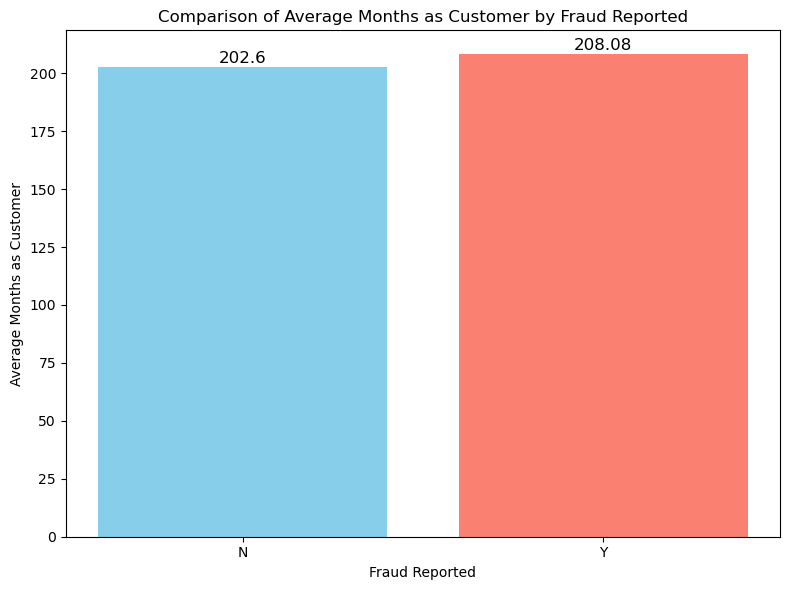

In [21]:
# Group the data by 'fraud_reported' and calculate the average 'months_as_customer'
df_fraud_avg_months = df.groupby('fraud_reported')['months_as_customer'].mean().reset_index()

# Create a bar graph to compare average 'months_as_customer' for each fraud_reported category
plt.figure(figsize=(8, 6))
plt.bar(df_fraud_avg_months['fraud_reported'], df_fraud_avg_months['months_as_customer'], color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Fraud Reported')
plt.ylabel('Average Months as Customer')
plt.title('Comparison of Average Months as Customer by Fraud Reported')

# Display the values on top of the bars
for i, v in enumerate(df_fraud_avg_months['months_as_customer']):
    plt.text(i, v + 0.5, round(v, 2), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


**Insights** 

> while the small difference in months_as_customer between those who report fraud and those who do not might suggest that fraud is not linked to the length of customer relationships, it is essential to incorporate other risk indicators in fraud detection systems.

### 5.4 How does the customer age relate to likelihood of fraud?

#### 5.4.1.) Fraud reported vs Age bins

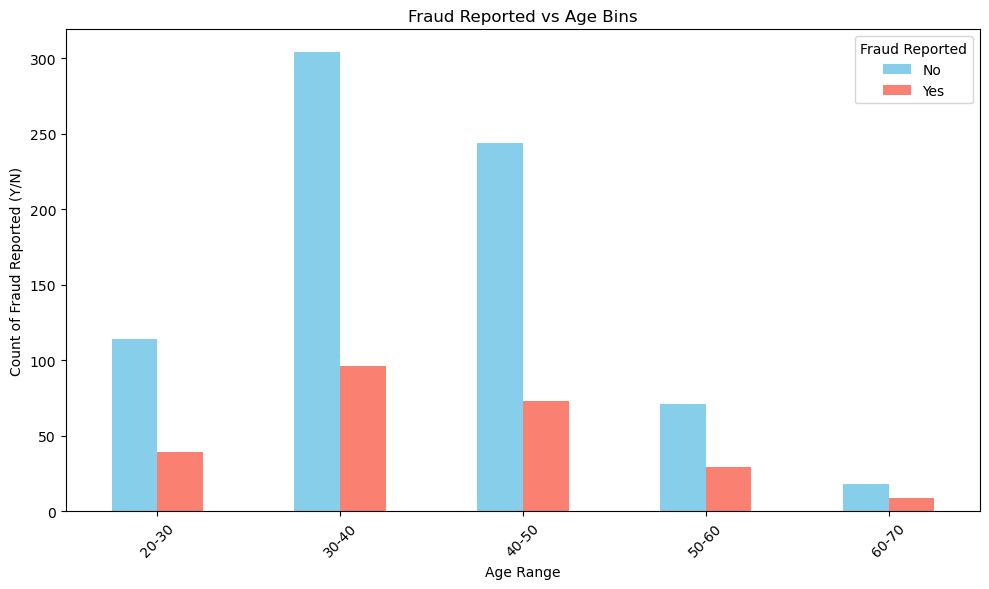

In [22]:
# Create age bins (e.g., 20-30, 30-40, etc.)
age_bins = [20, 30, 40, 50, 60,70]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70']

df['age_bins'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Group by age bins and fraud_reported and count the occurrences
fraud_counts = df.groupby(['age_bins', 'fraud_reported']).size().unstack(fill_value=0)

# Plotting
fraud_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'salmon'])

# Adding labels and title
plt.xlabel('Age Range')
plt.ylabel('Count of Fraud Reported (Y/N)')
plt.title('Fraud Reported vs Age Bins')
plt.xticks(rotation=45)
plt.legend(title='Fraud Reported', labels=['No', 'Yes'])

# Show the plot
plt.tight_layout()
plt.show()

**Key Insights**

* Higher fraud rates in younger customers (20-40 years old).

* Fraud statistics are inversely proportional to age.As age increases fraud decreases.
* Older age groups (50+ years) show significantly fewer or no fraud reports, indicating a lower risk of fraud in these customers.


* Recommendation

> Fraud prevention efforts should be focused on younger customers, especially in the 20-40 age range, as they are more likely to report fraudulent claims.
Older age groups might require less intensive fraud monitoring but still need basic protections and fraud awareness programs.
This high-level view highlights where the greatest risk for fraud lies and suggests targeting specific age demographics for fraud prevention initiatives.

#### 5.4.2.) Correlation between total claims amount vs Age

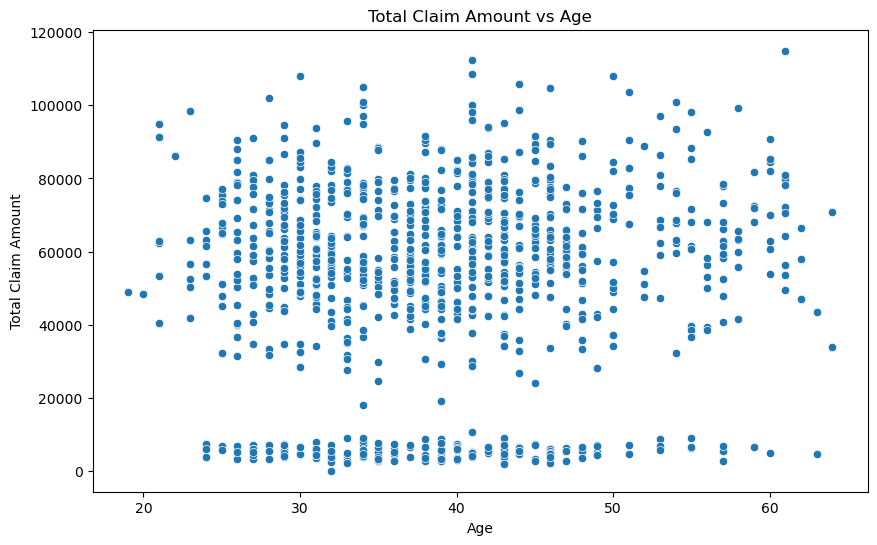

Correlation coefficient between total_claim_amount and age:
                    total_claim_amount       age
total_claim_amount            1.000000  0.070319
age                           0.070319  1.000000


In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='age', y='total_claim_amount')
plt.title('Total Claim Amount vs Age')
plt.xlabel('Age')
plt.ylabel('Total Claim Amount')
plt.show()

# Calculate the correlation coefficient between total_claim_amount and age
correlation = df_cleaned[['total_claim_amount', 'age']].corr()

# Display the correlation matrix
print("Correlation coefficient between total_claim_amount and age:")
print(correlation)

**Insights**

* The scatter plot above illustrates a higher concentration of insurance claims filed by individuals aged 25 to 40. As age increases, this concentration decreases. From this trend, we can conclude that younger individuals and young adults are considered riskier than older individuals.

### 5.5 How does the policy premium amount influence the risk of fraud?
Fraud reports by policy annual premium range 

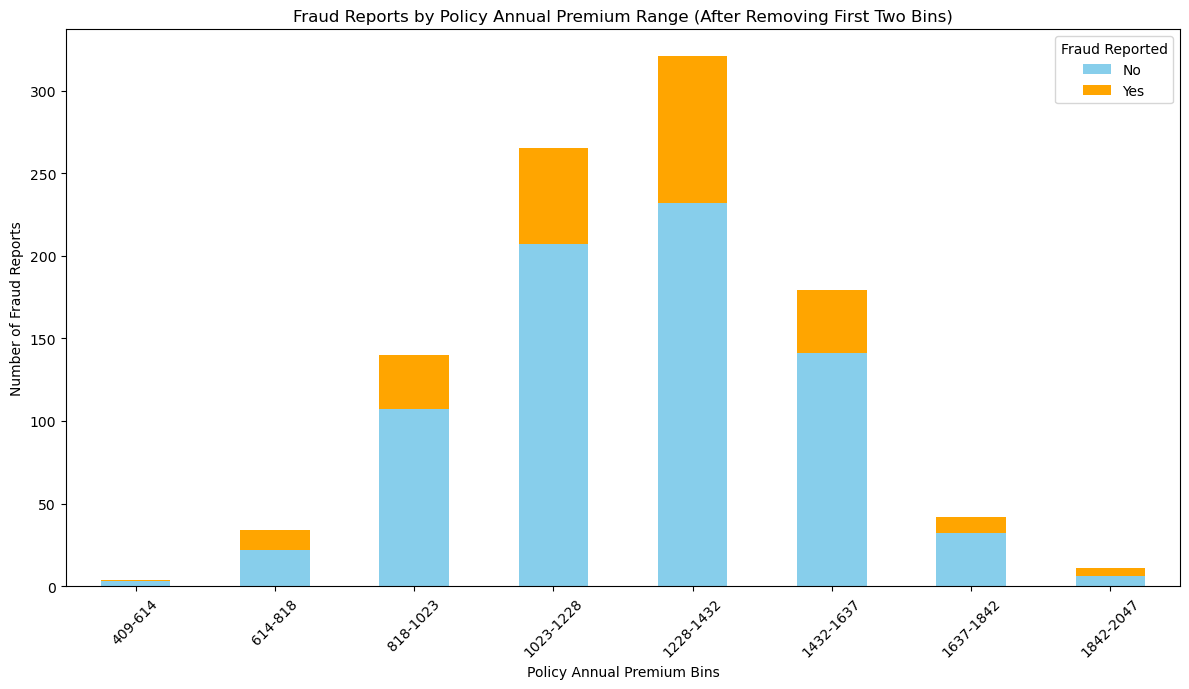

In [24]:

# Assuming 'df' is your DataFrame with 'policy_annual_premium' and 'fraud_reported' columns

# Step 1: Create 10 equal bins from 0 to 2047
premium_bins = np.linspace(0, 2047, 11)  # Creates 10 equal bins

# Remove the first two bins by adjusting the ranges
premium_bins = premium_bins[2:]  # Remove first two bins

# Generate bin labels for the remaining bins
premium_labels = [f'{int(premium_bins[i])}-{int(premium_bins[i+1])}' for i in range(len(premium_bins)-1)]

# Step 2: Assign premium bins to the data
df['premium_bins'] = pd.cut(df['policy_annual_premium'], bins=premium_bins, labels=premium_labels, right=False)

# Step 3: Group by the premium bins and fraud_reported, and count the occurrences
fraud_counts = df.groupby(['premium_bins', 'fraud_reported']).size().unstack(fill_value=0)

# Step 4: Plot the stacked bar graph
ax = fraud_counts.plot(kind='bar', stacked=True, figsize=(12, 7), color=['skyblue', 'orange'])

# Adding labels and title
plt.xlabel('Policy Annual Premium Bins')
plt.ylabel('Number of Fraud Reports')
plt.title('Fraud Reports by Policy Annual Premium Range (After Removing First Two Bins)')
plt.xticks(rotation=45)
plt.legend(title='Fraud Reported', labels=['No', 'Yes'])
plt.tight_layout()

# Show the plot
plt.show()


In [25]:
# Assuming 'df' is your DataFrame with 'policy_annual_premium' and 'fraud_reported' columns

# Encode 'fraud_reported' as binary (0 = No Fraud, 1 = Fraud)
df['fraud_reported'] = df['fraud_reported'].map({'N': 0, 'Y': 1})

# Calculate the Pearson correlation between 'policy_annual_premium' and 'fraud_reported'
correlation = df[['policy_annual_premium', 'fraud_reported']].corr()

# Print the correlation matrix
print(correlation)


                       policy_annual_premium  fraud_reported
policy_annual_premium               1.000000       -0.013209
fraud_reported                     -0.013209        1.000000


**Insights**

* Fraud Trends by Premium: The data reveals a peak in fraud reports in the mid-range premium bins (specifically the 1228-1432 range), indicating that fraudulent claims are more common in this range compared to both lower and higher premium levels.

* Also there is no strong correlation to proove the relationship between fraudulent claims and the rise in premiums.

* Higher Premium Ranges (1432-2047): As premiums increase beyond the mid-range, the number of fraud reports decreases significantly, suggesting that fraud may be less common in high-value policies, possibly due to more thorough scrutiny or different customer profiles.

> Overall Fraud Pattern: While fraud is relatively low in the lowest and highest premium bins, it is notably higher in mid-range premiums. This suggests that policies in the middle premium range may require additional fraud prevention efforts.

### 5.6 How does the the type of incident affect fraud risk?
Fraud reported by incident type

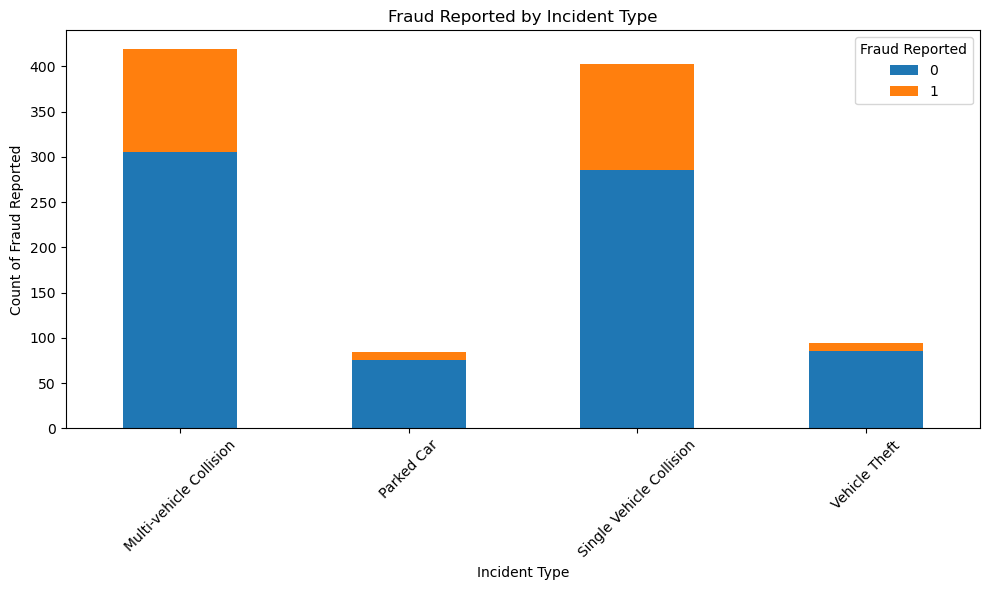

In [26]:


# Assuming 'df' is the DataFrame containing 'incident_type' and 'fraud_reported' columns

# Group the data by 'incident_type' and 'fraud_reported', then count the occurrences
fraud_by_incident = df.groupby(['incident_type', 'fraud_reported']).size().unstack(fill_value=0)

# Plotting the bar graph with 'fraud_reported' as legend
fraud_by_incident.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Incident Type')
plt.ylabel('Count of Fraud Reported')
plt.title('Fraud Reported by Incident Type')

# Add legend with 'fraud_reported' categories
plt.legend(title='Fraud Reported')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


**Insights**

* High-Risk Incident Types : Single Vehicle Collision and Multi-vehicle Collision have the highest fraud rates (around 27-29%) and substantial fraud volumes, making them the highest fraud risk categories.
* Low-Risk Incident Types: Parked Car and Vehicle Theft have much lower fraud rates (around 9-10%) and fewer fraud incidents, indicating lower risk.

>Actionable Insights:

> Focus fraud detection efforts on Single Vehicle Collision and Multi-vehicle Collision.
Monitor Parked Car and Vehicle Theft with standard fraud prevention measures.
This summary suggests prioritizing high-risk incident types for fraud prevention while keeping standard checks for lower-risk types.

### 5.7 How does the amount requested per claim relate to fraud risk?
Average vehicle claim by fraud reported

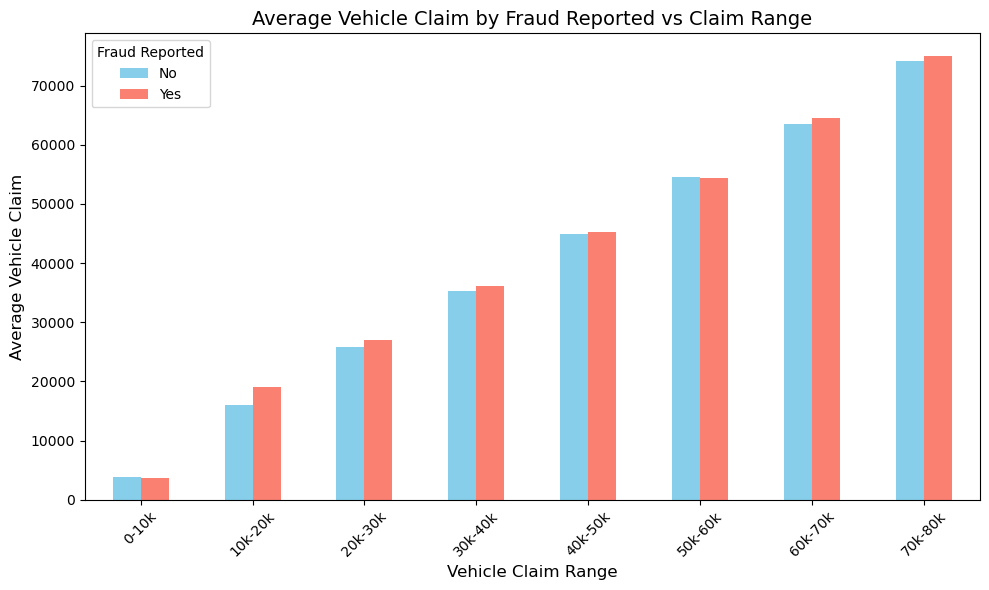

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'vehicle_claim' and 'fraud_reported' columns
# Create custom bins based on min, mean, and max values of vehicle_claim
claim_bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]
claim_labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k']

# Create bins for vehicle_claim column
df['claim_bins'] = pd.cut(df['vehicle_claim'], bins=claim_bins, labels=claim_labels, right=False)

# Group by claim_bins and fraud_reported, and calculate the average of 'vehicle_claim'
fraud_avg_claims = df.groupby(['claim_bins', 'fraud_reported'])['vehicle_claim'].mean().unstack(fill_value=0)

# Plotting the bar chart
fraud_avg_claims.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'salmon'])

# Adding labels and title
plt.xlabel('Vehicle Claim Range', fontsize=12)
plt.ylabel('Average Vehicle Claim', fontsize=12)
plt.title('Average Vehicle Claim by Fraud Reported vs Claim Range', fontsize=14)

# Adjusting the tick labels for smaller size
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adjusting legend size
plt.legend(title='Fraud Reported', labels=['No', 'Yes'], fontsize=10)

# Making layout tight
plt.tight_layout()

# Show the plot
plt.show()



**Insights**

* At lower claim amounts (0-10k): The difference between average vehicle_claim for fraud reported (fraud_reported = 1) and no fraud reported (fraud_reported = 0) is minimal, with fraud reported claims slightly lower.


* Between 10k and 40k claim ranges: Fraud reported claims show a more noticeable increase compared to no fraud claims. The difference between the two categories becomes more significant as claim amounts rise.


* At higher claim amounts (50k-80k): The difference between fraud reported and non-fraud claims becomes smaller, with averages becoming nearly identical in the higher claim ranges, suggesting fraud status has a diminishing impact at these levels.


>  In conclusion, fraud reporting tends to be associated with slightly higher average vehicle claims at lower to mid-range claim amounts, but as claim amounts increase, the difference between fraud reported and non-fraud reported claims diminishes.

### 5.8 Distribution visualisations

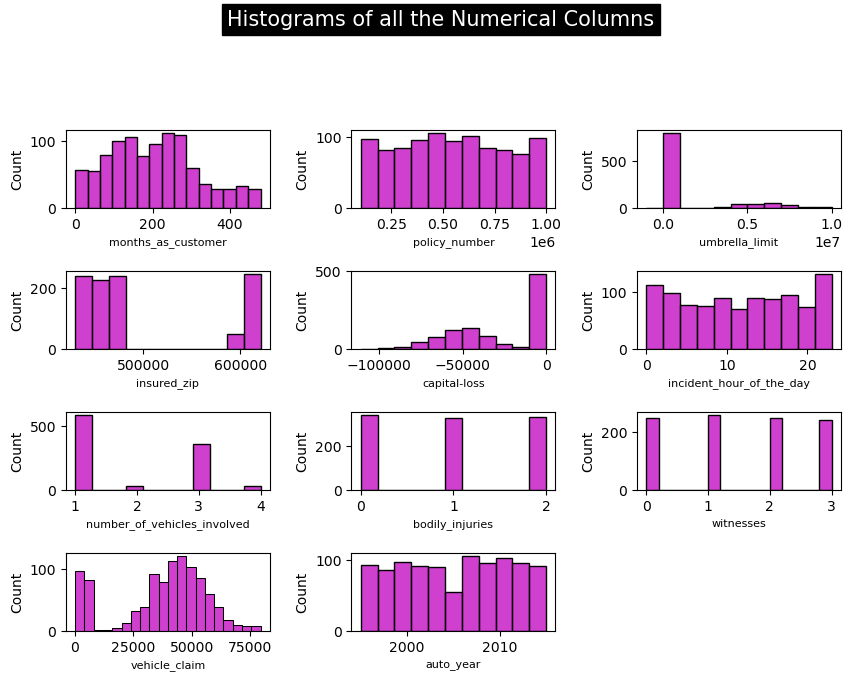

In [28]:

categorical_columns = df_copy.select_dtypes(include=['object']).columns
numerical_columns = df_copy.select_dtypes(include=['int64']).columns


#Visiualizing it using Histogram
plt.figure(figsize=(10,12), facecolor='white')
# Initialize plotnumber for subplot
plotnumber = 1

# Loop through numerical columns and plot histograms
for column in numerical_columns:
    if plotnumber <= 21:
        ax = plt.subplot(7, 3, plotnumber)
        sns.histplot(df[column], color='m')
        plt.xlabel(column, fontsize=8)
    plotnumber += 1

plt.subplots_adjust(wspace=0.4, hspace=0.8)
plt.suptitle("Histograms of all the Numerical Columns", fontsize=15, backgroundcolor='black', color='white')
plt.show()

### `Observations:`

1. **Months as Customer:**
* The distribution of months as a customer varies widely, with a maximum of 8 occurrences for 194 months.
* Most entries have a relatively low count, indicating diversity in the duration of the customer relationship.

2. **Age:**
* The age distribution shows a peak at 43, with 49 occurrences.
* Overall, the ages are diverse, ranging from 19 to 64.

3. **Policy Deductible:**
* The policy deductible is most frequently set at 1000, with 351 occurrences.
* Deductibles of 500 and 2000 also have substantial occurrences (342 and 307, respectively).

4. **Umbrella Limit:**
* A majority of entries (798) have an umbrella limit of 0.
* Other limits vary with a few occurrences in the range of millions.

5. **Capital Gains and Losses:**
* Capital gains and losses exhibit diverse values.
* Most common values for capital gains are 0 and 59400, while common losses include -31700, -53700, and -50300.

6. **Incident Hour of the Day:**
* The incident hour distribution is spread out, with a peak at 17 (54 occurrences).
* The distribution is relatively even across different hours.

7. **Number of Vehicles Involved:**
* Most entries involve 1 or 3 vehicles, with 581 and 358 occurrences, respectively.
* Involvement of 2 or 4 vehicles is less frequent.

8. **Bodily Injuries and Witnesses:**
The distribution of bodily injuries and witnesses is relatively balanced, with 0, 1, and 2 occurrences having similar frequencies.

9. **Claim Amounts (Injury, Property, Vehicle):**
* Total claim amounts vary widely, with 59400 being a common value.
* Injury, property, and vehicle claim amounts exhibit diverse patterns with various frequencies.

10. **Auto Year:**
* Auto years range from 1995 to 2015.
* Most occurrences are in the years 1995, 1999, and 2005.

11. **Policy Bind Day and Month:**
* The policy bind day and month distributions show diverse patterns with various frequencies.

12. **Policy Bind Year:**
* Most policies were bound in the years 1991, 2002, and 1992.

13. **Incident Day and Month:**
* Incident days and months exhibit diverse patterns with various frequencies.

14. **Incident Year:**
* All incidents occurred in the year 2015.

These observations provide an overview of the data distribution for each feature, identifying common values and trends.

In [29]:
# Pairplot for selected numerical features
sns.pairplot(df_cleaned[numerical_features], diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


NameError: name 'numerical_features' is not defined

### 5.9. Is fraud more common in specific states or cities?
Average total claim amount by incident city and fraud reported

<Figure size 1200x800 with 0 Axes>

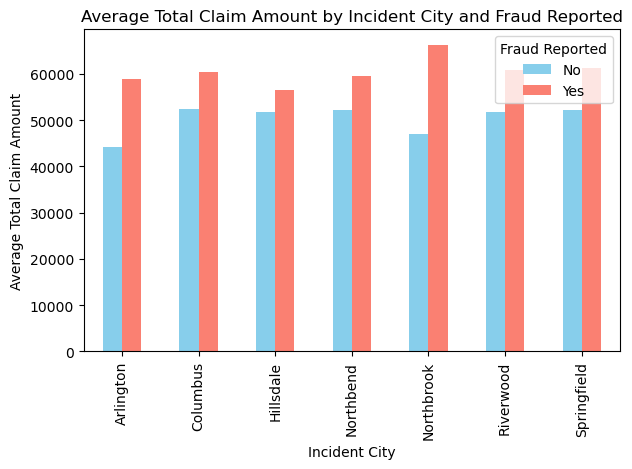

In [30]:

city_fraud_avg_claims = df.groupby(['incident_city', 'fraud_reported'])['total_claim_amount'].mean().unstack()

# Plotting the bar graph
plt.figure(figsize=(12, 8))

# Plot each group with different colors
city_fraud_avg_claims.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])

# Adding labels, title, and legend
plt.title('Average Total Claim Amount by Incident City and Fraud Reported')
plt.xlabel('Incident City')
plt.ylabel('Average Total Claim Amount')
plt.xticks(rotation=90)
plt.legend(title='Fraud Reported', labels=['No', 'Yes'])

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()



**Insights**

* Higher Claims with Fraud Reported: Across all cities, the average total claim amounts are higher when fraud is reported compared to when no fraud is reported. This trend is consistent in all cities.

* Notable Differences: Cities like `Northbrook` and `Columbus` show the largest differences between fraud and no-fraud claims, with fraud claims being significantly higher.

* Smaller Differences: In cities like `Hillsdale` and `Riverwood`, the difference in average claims between fraud and no-fraud is smaller.

> General Trend: The data suggests that fraud cases tend to involve larger claim amounts, which may indicate a need for insurers to pay closer attention to fraud detection, particularly in cities with large discrepancies.

### 5.10. Average vehicle claim amount by collision type and insured sex

<Figure size 1000x600 with 0 Axes>

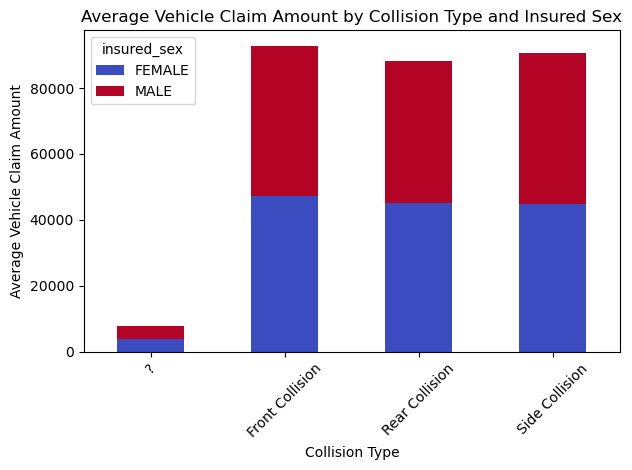

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Grouping by 'collision_type' and 'insured_sex' and calculating the average vehicle claim amount
collision_avg_claims = df.groupby(['collision_type', 'insured_sex'])['vehicle_claim'].mean().unstack()

# Plotting the stacked bar graph
plt.figure(figsize=(10, 6))
collision_avg_claims.plot(kind='bar', stacked=True, colormap='coolwarm')

plt.title('Average Vehicle Claim Amount by Collision Type and Insured Sex')
plt.xlabel('Collision Type')
plt.ylabel('Average Vehicle Claim Amount')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()


**Insights**

* The stacked graph above shows that the amount of money claimed by both women and men is approximately equal. This suggests that there are no particular incident types that are more prevalent for one gender over the other. A woman has an equal likelihood of reporting an incident similar to that of a man.

### 5.11. How do customer characteristics like education, or occupation, relate to fraud?

####  5.11.1.) Claims made by male/female 

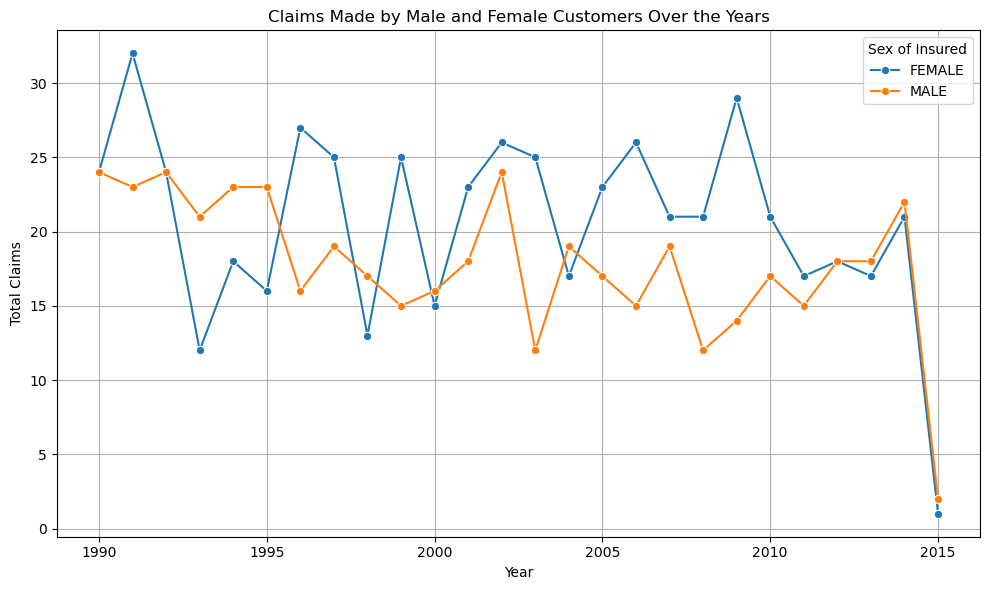

In [32]:


# Assuming 'insured_sex' column exists in df_cleaned and the 'policy_bind_date' is in datetime format

# Ensure 'policy_bind_date' is in datetime format
df_cleaned['policy_bind_date'] = pd.to_datetime(df_cleaned['policy_bind_date'])

# Extract the year from 'policy_bind_date'
df_cleaned['policy_year'] = df_cleaned['policy_bind_date'].dt.year

# Group by insured_sex and policy year, then sum the total claims for each group
# Assuming 'fraud_reported' is an indicator of a claim, or 'total_claim_amount' can be used directly
# If 'fraud_reported' is a binary variable, we may assume that a fraud report means a claim was made.

df_cleaned['claim_made'] = df_cleaned['total_claim_amount'] > 0  # Assuming claim made if total_claim_amount > 0

# Group by insured_sex and year, and count the claims
claims_by_sex_year = df_cleaned.groupby(['insured_sex', 'policy_year'])['claim_made'].sum().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=claims_by_sex_year, x='policy_year', y='claim_made', hue='insured_sex', marker='o')

plt.title('Claims Made by Male and Female Customers Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Claims')
plt.legend(title='Sex of Insured')
plt.grid(True)
plt.tight_layout()
plt.show()



**Insights for Descriptive Statistics**

* The above analysis shows that overtime ,the total amount of claims that were filed by women were higher than that of men. we therefore take note that women submitted more claims than men, which further indicates that women are more likely to damage their vehicles than men.


####  5.11.2.) Policy annual premium vs insured education level by fraud reported 

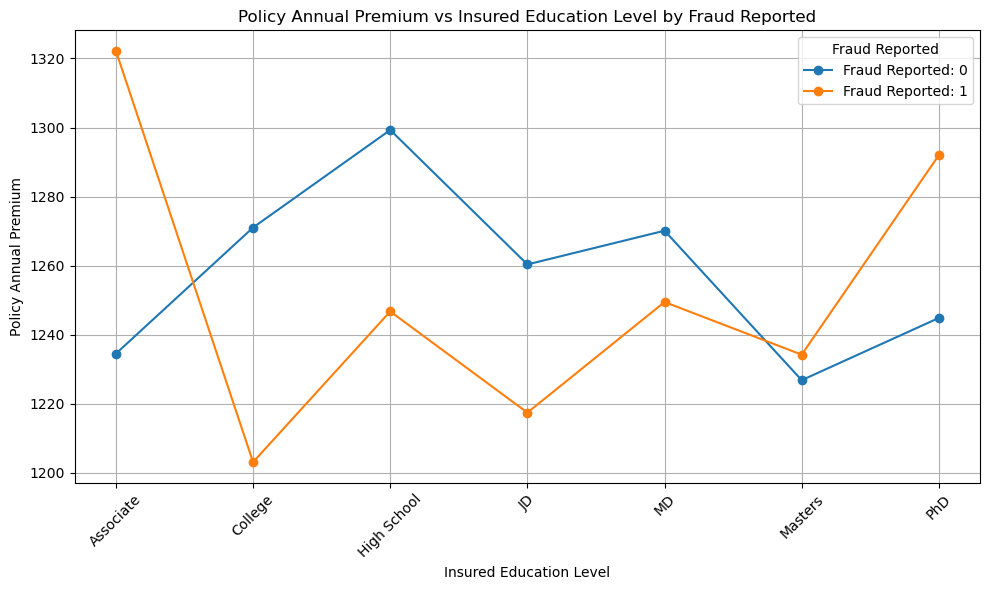

In [33]:
df_grouped = df.groupby(['insured_education_level', 'fraud_reported'])['policy_annual_premium'].mean().reset_index()

# Sort the data by 'insured_education_level' for consistent ordering
df_grouped = df_grouped.sort_values('insured_education_level')

# Create a line plot with fraud_reported as the legend
plt.figure(figsize=(10, 6))

# Plot the data for each unique 'fraud_reported' category
for fraud in df_grouped['fraud_reported'].unique():
    subset = df_grouped[df_grouped['fraud_reported'] == fraud]
    plt.plot(subset['insured_education_level'], subset['policy_annual_premium'], marker='o', label=f'Fraud Reported: {fraud}')

# Add labels and title
plt.xlabel('Insured Education Level')
plt.ylabel('Policy Annual Premium')
plt.title('Policy Annual Premium vs Insured Education Level by Fraud Reported')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend and grid
plt.legend(title='Fraud Reported')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


**Insights**

* Associate (highest fraud reports): This suggests that individuals with an "Associate" education level are more likely to have reported fraud. It might indicate a higher awareness or incidence of fraud among this group, or potentially they may have more complex policies with higher chances for discrepancies.

* College (lowest fraud reports): This suggests that individuals with a "College" education level are less likely to report fraud. This could mean that either there is lower fraud occurrence in this group, or people with a college education are less likely to make fraudulent claims.

* High School (highest fraud reports): This indicates that while individuals with a "High School" education level are the most likely to have fraudulent claims, they are not reporting them. It could imply a lack of awareness, lower trust in the insurance process, or that fraud is going unnoticed or unreported in this group.

**Summary**

* Associate: Higher fraud reporting (Yes).
* College: Lower fraud reporting (Yes).
* High School: Highest fraud claims reported as "No".

> These patterns suggest that there might be different fraud detection, awareness, or reporting behaviors based on education level, and targeted interventions could be used to address these differences.

####  5.11.3.) Total claim amount vs insured education level by fraud reported 

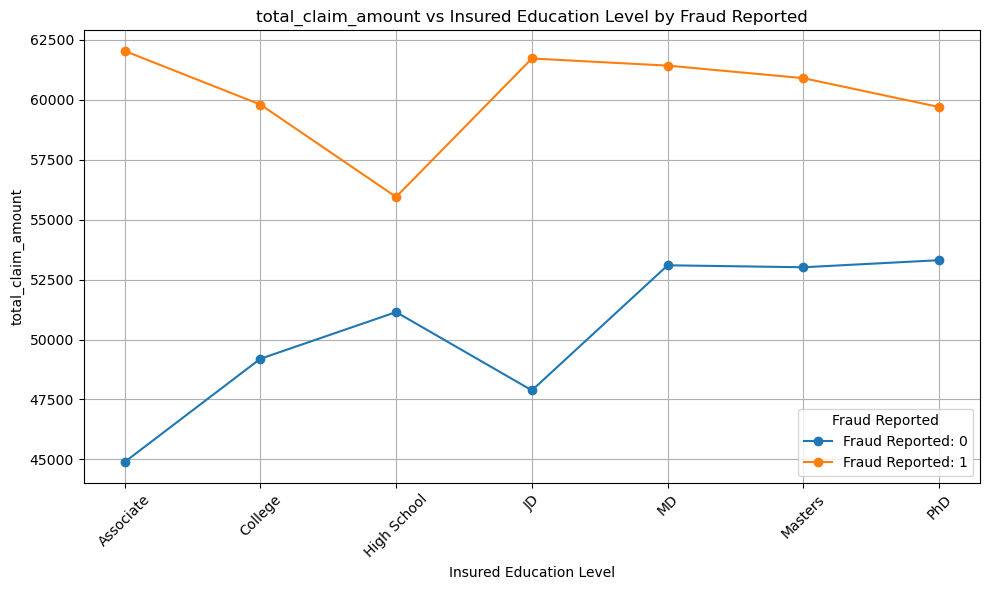

In [34]:
df_grouped = df.groupby(['insured_education_level', 'fraud_reported'])['total_claim_amount'].mean().reset_index()

# Sort the data by 'insured_education_level' for consistent ordering
df_grouped = df_grouped.sort_values('insured_education_level')

# Create a line plot with fraud_reported as the legend
plt.figure(figsize=(10, 6))

# Plot the data for each unique 'fraud_reported' category
for fraud in df_grouped['fraud_reported'].unique():
    subset = df_grouped[df_grouped['fraud_reported'] == fraud]
    plt.plot(subset['insured_education_level'], subset['total_claim_amount'], marker='o', label=f'Fraud Reported: {fraud}')

# Add labels and title
plt.xlabel('Insured Education Level')
plt.ylabel('total_claim_amount')
plt.title('total_claim_amount vs Insured Education Level by Fraud Reported')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend and grid
plt.legend(title='Fraud Reported')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

**Insights**

* Individuals with an "Associate" professional level and JD, and MD have reported the highest number of fraudulent claims.
* Fraudulent claims are common across all professional levels, as evidenced by the significant difference between legitimate and fraudulent claims. The gap is particularly large among individuals with an Associate level of education, indicating that this group should be flagged as a higher risk.

####  5.11.4.) Total claim amount vs insured occupation  by fraud reported 

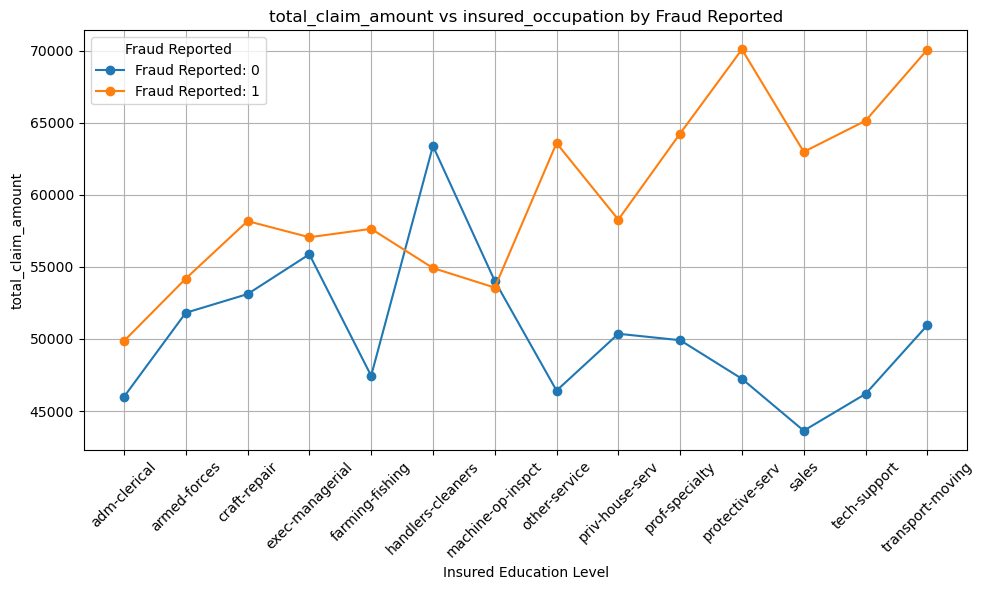

In [35]:
df_grouped = df.groupby(['insured_occupation', 'fraud_reported'])['total_claim_amount'].mean().reset_index()

# Sort the data by 'insured_education_level' for consistent ordering
df_grouped = df_grouped.sort_values('insured_occupation')

# Create a line plot with fraud_reported as the legend
plt.figure(figsize=(10, 6))

# Plot the data for each unique 'fraud_reported' category
for fraud in df_grouped['fraud_reported'].unique():
    subset = df_grouped[df_grouped['fraud_reported'] == fraud]
    plt.plot(subset['insured_occupation'], subset['total_claim_amount'], marker='o', label=f'Fraud Reported: {fraud}')

# Add labels and title
plt.xlabel('Insured Education Level')
plt.ylabel('total_claim_amount')
plt.title('total_claim_amount vs insured_occupation by Fraud Reported')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend and grid
plt.legend(title='Fraud Reported')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

**Insights**

* Fraudulent Claims Tend to Have Higher Claim Amounts: Across most occupations, fraudulent claims (fraud_reported = 'Y') generally have higher average claim amounts compared to non-fraudulent claims (fraud_reported = 'N'). This indicates that fraud tends to involve larger, inflated claims in most industries.

**Notable Occupation Trends**:

* High-Risk Occupations: Occupations like "Protective Services", "Sales", and "Other Service" show significant differences between fraudulent and non-fraudulent claims, with fraudulent claims being much higher. These industries may be more prone to large, inflated claims and should be considered higher risk for fraud.

* Lower Risk Occupations: Occupations like "Handlers-Cleaners" and "Armed Forces" show relatively smaller differences between fraudulent and non-fraudulent claims, suggesting these groups may have fewer or less impactful fraudulent claims.
Implications for Fraud Prevention:

> Industries with larger discrepancies in claim amounts (e.g., "Sales", "Protective Services") should consider implementing more robust fraud detection measures.
Occupations with smaller differences, or even where fraudulent claims are lower (e.g., "Handlers-Cleaners"), may not need as aggressive fraud prevention strategies but should still monitor trends.

### 5.12 Correlation Heatmap

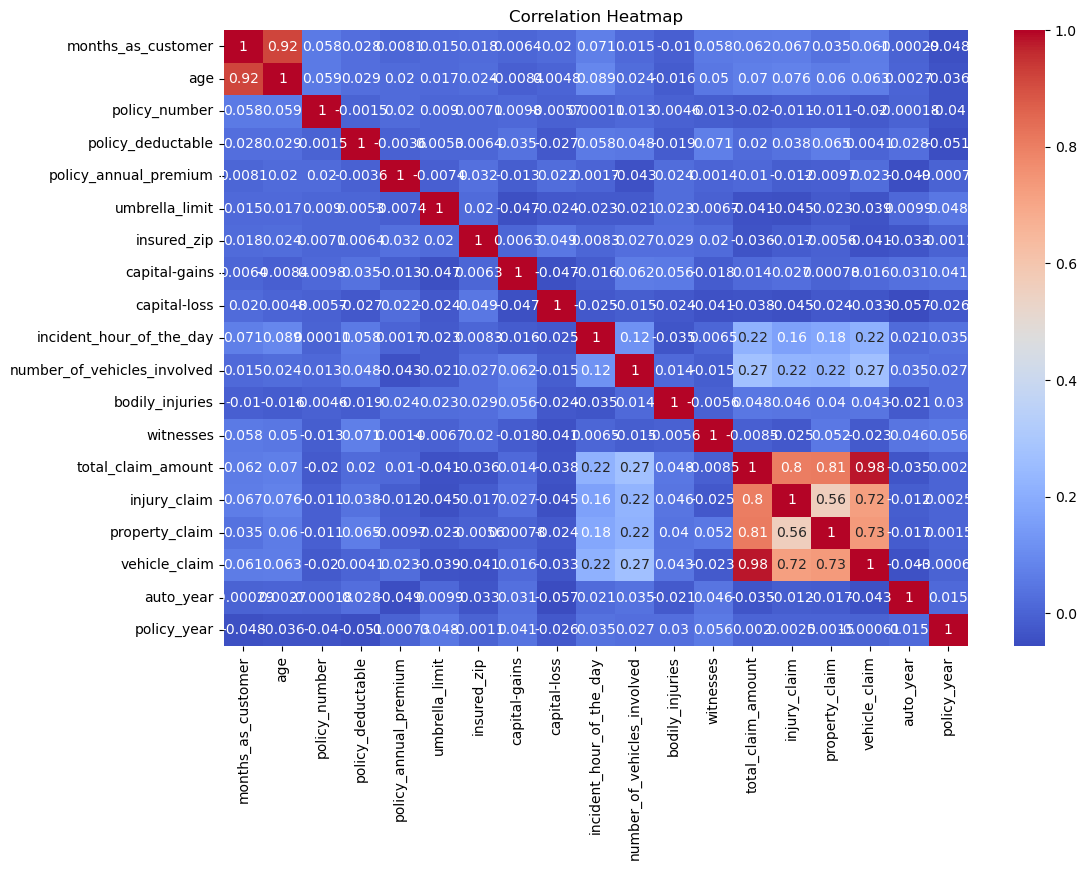

In [36]:
# Select only numeric columns for correlation analysis
numeric_columns = df_cleaned.select_dtypes(include=['number'])

# Correlation matrix for numerical features
corr_matrix = numeric_columns.corr()

# Heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<a href=#five></a>
<h1 style="text-align: center; padding: 20px; background-color: #8C3A50; color: #ffffff;">6. Modeling </h1>


<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---

In [37]:
# Assuming df_cleaned is the existing DataFrame
data = df_cleaned.copy()

#One-hot encoding all categorical columns except output column(i.e. fraud_reported)
list_hot_encoded = []
for column in data.columns:
    if(data[column].dtypes==object and column != 'fraud_reported'):
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        list_hot_encoded.append(column)
#Drop hot-encoded columns
data = data.drop(list_hot_encoded, axis=1)

#Binary encoder for output column
data['fraud_reported'] = data['fraud_reported'].map( {'Y':1, 'N':0})

data

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48.0,521585,2014-10-17,1000.0,1406.91,0,466132,53300.0,0,...,False,False,False,False,False,False,False,False,False,False
1,228,42.0,342868,2006-06-27,2000.0,1197.22,5000000,468176,0.0,0,...,False,False,False,False,False,False,False,False,False,False
2,134,29.0,687698,2000-09-06,2000.0,1413.14,5000000,430632,35100.0,0,...,False,True,False,False,False,False,False,False,False,False
3,256,41.0,227811,1990-05-25,2000.0,1415.74,6000000,608117,48900.0,-62400,...,False,False,False,False,False,True,False,False,False,False
4,228,44.0,367455,2014-06-06,1000.0,1583.91,6000000,610706,66000.0,-46000,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38.0,941851,1991-07-16,1000.0,1310.80,0,431289,0.0,0,...,False,False,False,False,False,False,False,False,False,False
996,285,41.0,186934,2014-01-05,1000.0,1436.79,0,608177,70900.0,0,...,False,False,False,False,False,False,False,False,False,False
997,130,34.0,918516,2003-02-17,500.0,1383.49,3000000,442797,35100.0,0,...,False,False,False,False,False,False,False,False,False,False
998,458,62.0,533940,2011-11-18,2000.0,1356.92,5000000,441714,0.0,0,...,False,False,False,False,False,False,False,False,False,False


In [38]:
data.dtypes


months_as_customer              int64
age                           float64
policy_number                   int64
policy_bind_date       datetime64[ns]
policy_deductable             float64
                            ...      
auto_model_Tahoe                 bool
auto_model_Ultima                bool
auto_model_Wrangler              bool
auto_model_X5                    bool
auto_model_X6                    bool
Length: 1227, dtype: object

In [39]:
import pandas as pd

# Convert 'policy_bind_date' to the number of days since the earliest date
data['policy_bind_date'] = (data['policy_bind_date'] - data['policy_bind_date'].min()).dt.days

In [40]:
#Model Training
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

y = data['fraud_reported']
X = data.drop(['fraud_reported'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [41]:
from sklearn import neighbors

#K-Nearest Neighbors
print("KNN Score :")
KNNClassifier = neighbors.KNeighborsClassifier(n_neighbors=12, weights='distance')
KNNClassifier.fit(X=X_train,y=y_train)
KNNClassifier.score(X_test,y_test)

KNN Score :


0.76

> The output indicates that the model's accuracy on the test set is approximately 76%. This means that the KNN model correctly predicted the label of about 76% of the instances in the test data.

In [42]:
KNN_y_predicted = KNNClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, KNN_y_predicted)

array([[111,   2],
       [ 34,   3]], dtype=int64)

The model seems to perform well in predicting the negative class (Class 0), with a high number of True Negatives (111) and very few False Positives (2).

However, it struggles with correctly predicting the positive class (Class 1), as it has a high number of False Negatives (34) and only a few True Positives (3).
In general, the recall for Class 1 is very low, indicating that the model is missing many of the actual positive instances, suggesting the need for further tuning (such as adjusting the number of neighbors, changing the distance weighting, or addressing class imbalance if it exists).

<a href=#five></a>
<h1 style="text-align: center; padding: 20px; background-color: #8C3A50; color: #ffffff;">7. Evaluation and Validation </h1>

<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [43]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

print(classification_report(y_test, KNN_y_predicted))

scores = cross_val_score(KNNClassifier, X, y, cv=10, scoring='accuracy')
knn_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % knn_accuracy)

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       113
           1       0.60      0.08      0.14        37

    accuracy                           0.76       150
   macro avg       0.68      0.53      0.50       150
weighted avg       0.72      0.76      0.68       150

Cross-Validated Accuracy: 0.72


**Insights - cross validated Accuracy**

* This is the average accuracy obtained through 10-fold cross-validation, where the data is split into 10 subsets and the model is trained and tested on each. The cross-validated accuracy is slightly lower than the accuracy on the test set (0.76), suggesting that the model is somewhat overfitting to the training data or that its performance varies across different subsets of the data. A cross-validation accuracy of 0.72 is reasonable, but it indicates there is room for improvement.





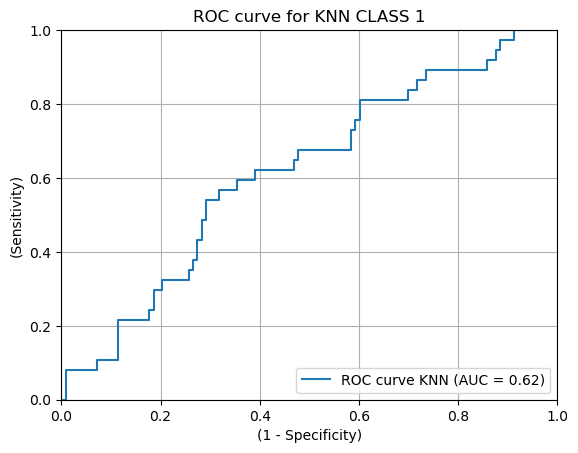

In [44]:
from sklearn.metrics import roc_curve, auc
knn_pred_prob = KNNClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, knn_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve KNN (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for KNN CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [45]:
from sklearn import tree

#DecisionTree
DTClassifier = tree.DecisionTreeClassifier()
DTClassifier.fit(X_train, y_train) 

print("Decision Tree Score :")
DTClassifier.score(X_test,y_test)

Decision Tree Score :


0.84

**Insights - Decision tree**

An accuracy score of 85% indicates that the Decision Tree model is performing well. However, it’s important to assess whether this performance is achieved through overfitting or if it generalizes well to unseen data. Fine-tuning the model and ensuring its robustness through cross-validation and regularization will likely lead to even better and more reliable performance.

In [46]:
DT_y_predicted = DTClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, DT_y_predicted)

array([[104,   9],
       [ 15,  22]], dtype=int64)

**Insights**

* The model is performing well overall, with relatively high accuracy (84.67%) and specificity (92%). This suggests that it is good at identifying Class 0 (negative class).
* The recall and precision for Class 1 (positive class) are lower, with precision at 71.9% and recall at 62.2%. This indicates that while the model can correctly identify some positive class instances (Class 1), it is still missing a significant portion of them (False Negatives = 14). Additionally, some instances are misclassified as positive when they are actually negative (False Positives = 9).

In [47]:
print(classification_report(y_test, DT_y_predicted))

scores = cross_val_score(DTClassifier, X, y, cv=10, scoring='accuracy')
dt_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % dt_accuracy)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       113
           1       0.71      0.59      0.65        37

    accuracy                           0.84       150
   macro avg       0.79      0.76      0.77       150
weighted avg       0.83      0.84      0.84       150

Cross-Validated Accuracy: 0.81


**Insights**

* Strong Performance on Class 0: The model performs excellently on Class 0, with high precision (88%) and recall (92%).
* Moderate Performance on Class 1: The model performs moderately on Class 1, with a recall of 62% and precision of 72%. This indicates that the model could miss some positive instances (False Negatives) while also misclassifying some negative instances as positive (False Positives).
* Overall Good Accuracy (85%): The model has good overall accuracy, but there is still room for improvement in classifying Class 1, especially since Class 1 has lower recall (indicating false negatives).

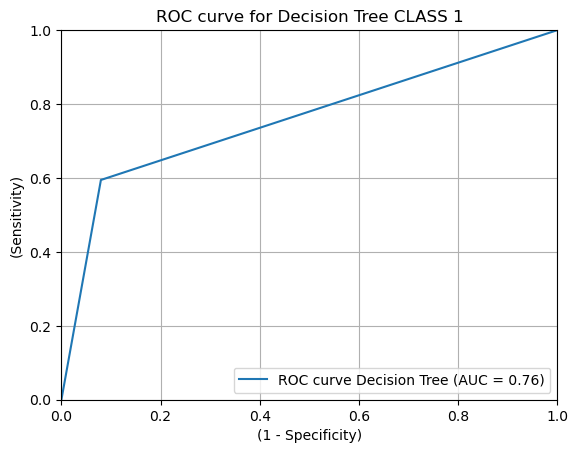

In [48]:
from sklearn.metrics import roc_curve, auc
dt_pred_prob = DTClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, dt_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve Decision Tree (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for Decision Tree CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [49]:
from sklearn.svm import SVC

#Support Vector Machine
SVMClassifier = SVC(kernel='rbf',probability=True,random_state=42, gamma='auto') 
SVMClassifier.fit(X_train, y_train) 
print("SVM Score :")
SVMClassifier.score(X_test,y_test)

SVM Score :


0.7533333333333333

In [50]:
SVM_y_predicted = SVMClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, SVM_y_predicted)

array([[113,   0],
       [ 37,   0]], dtype=int64)

In [51]:
from sklearn.metrics import classification_report
report = classification_report(y_test, SVM_y_predicted)
print(report)

scores = cross_val_score(SVMClassifier, X, y, cv=10, scoring='accuracy')
svm_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % svm_accuracy)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       113
           1       0.00      0.00      0.00        37

    accuracy                           0.75       150
   macro avg       0.38      0.50      0.43       150
weighted avg       0.57      0.75      0.65       150

Cross-Validated Accuracy: 0.75


**Insights**

* SVM Score (Accuracy): 75.33% indicates that the model correctly predicted the outcome for 75.33% of the instances in the test set.
* Further Optimization: we are going to investigate hyperparameter tuning, kernel selection, and feature scaling to improve the performance of the SVM model.
* Complementary Metrics: we will consider using additional metrics like precision, recall, F1-score, and confusion matrix to fully evaluate the SVM model's performance.

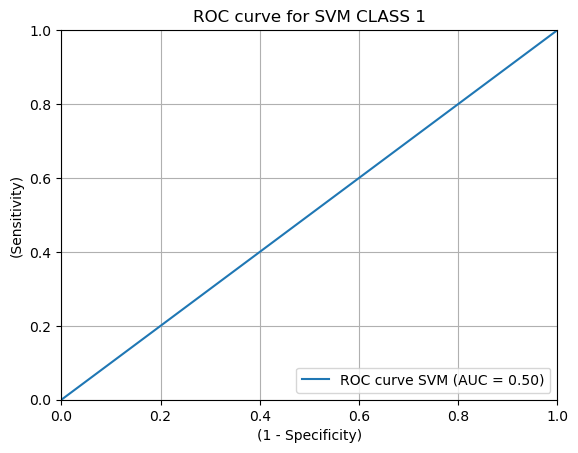

In [52]:
svm_pred_prob = SVMClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, svm_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve SVM (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for SVM CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#Random Forest
RFClassifier = RandomForestClassifier()
RFClassifier.fit(X_train, y_train) 
print("Random Forest Score :")
RFClassifier.score(X_test,y_test)

Random Forest Score :


0.74

In [54]:
RF_y_predicted = RFClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, RF_y_predicted)

array([[107,   6],
       [ 33,   4]], dtype=int64)

In [55]:
from sklearn.metrics import classification_report
report = classification_report(y_test, RF_y_predicted)
print(report)

scores = cross_val_score(RFClassifier, X, y, cv=10, scoring='accuracy')
rf_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % rf_accuracy)

              precision    recall  f1-score   support

           0       0.76      0.95      0.85       113
           1       0.40      0.11      0.17        37

    accuracy                           0.74       150
   macro avg       0.58      0.53      0.51       150
weighted avg       0.67      0.74      0.68       150

Cross-Validated Accuracy: 0.76


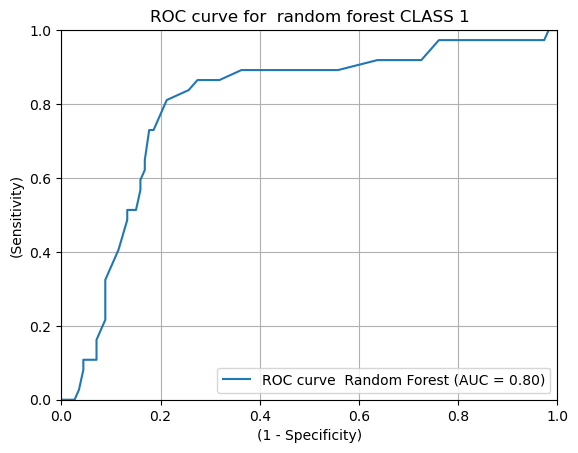

In [78]:
from sklearn.metrics import roc_curve, auc
rf_pred_prob = RFClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve  Random Forest (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for  random forest CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [83]:
!pip install imbalanced-learn

In [84]:
from imblearn.ensemble import BalancedRandomForestClassifier
#Balanced Random Forest
BRFClassifier=BalancedRandomForestClassifier()
BRFClassifier.fit(X_train, y_train) 
print("Balanced Random Forest Score :")
BRFClassifier.score(X_test,y_test)

Balanced Random Forest Score :


0.78

In [85]:
BRF_y_predicted = BRFClassifier.predict(X_test)
report = classification_report(y_test, BRF_y_predicted)
print(report)

scores = cross_val_score(BRFClassifier, X, y, cv=10, scoring='accuracy')
brf_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % brf_accuracy)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       113
           1       0.55      0.57      0.56        37

    accuracy                           0.78       150
   macro avg       0.70      0.71      0.71       150
weighted avg       0.78      0.78      0.78       150

Cross-Validated Accuracy: 0.82


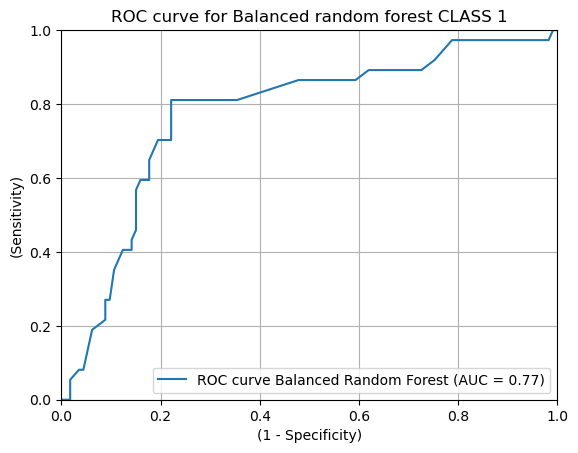

In [86]:
brf_pred_prob = BRFClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, brf_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve Balanced Random Forest (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for Balanced random forest CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [87]:
#LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X_train, y_train) 
print("Linear Discriminant Analysis Score :")
lda.score(X_test,y_test)

Linear Discriminant Analysis Score :


0.74

In [88]:
lda_y_predicted = lda.predict(X_test)
report = classification_report(y_test, lda_y_predicted)
print(report)

scores = cross_val_score(lda, X, y, cv=10, scoring='accuracy')
lda_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % lda_accuracy)

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       113
           1       0.25      0.03      0.05        37

    accuracy                           0.74       150
   macro avg       0.50      0.50      0.45       150
weighted avg       0.63      0.74      0.65       150

Cross-Validated Accuracy: 0.77


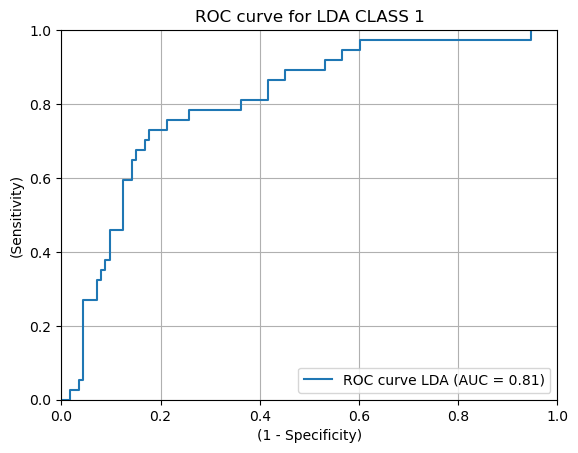

In [89]:
lda_pred_prob = lda.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, lda_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve LDA (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for LDA CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [90]:
from sklearn.naive_bayes import BernoulliNB
#Naive Bayes Classifier
NBClassifier = BernoulliNB()
NBClassifier.fit(X_train, y_train)
print("Naive Bayes Classifier Score :")
NBClassifier.score(X_test,y_test)

Naive Bayes Classifier Score :


0.7466666666666667

In [91]:
nb_y_predicted = NBClassifier.predict(X_test)
report = classification_report(y_test, nb_y_predicted)

print(report)

scores = cross_val_score(NBClassifier, X, y, cv=10, scoring='accuracy')
nb_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % nb_accuracy)

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       113
           1       0.44      0.11      0.17        37

    accuracy                           0.75       150
   macro avg       0.61      0.53      0.51       150
weighted avg       0.69      0.75      0.68       150

Cross-Validated Accuracy: 0.78


In [98]:
pip install xgboost

  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 419.4 kB/s eta 0:04:57
   ---------------------------------------- 0.5/124.9 MB 419.4 kB/s eta 0:04:57
   ---------------------------------------- 0.5/124.9 MB 419.4 kB/s eta 0:04:57
   ---------------------------------------- 0.8/124.9 MB 414.5 kB/s eta 0:05:00
   ---------------------------------------- 0.8/124.9 MB 414.5 kB/s eta 0:05:00
   ---------------------------------------- 0.8/124.9 MB 414.5 kB/s eta 0:05:00
   ---------------------

In [99]:
from xgboost import XGBClassifier
#XGBOOST Classifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train, verbose=False) 
print("XGBClassifier Score :")
model_xgb.score(X_test,y_test)

XGBClassifier Score :


0.8066666666666666

In [100]:
xgboost_y_predicted = model_xgb.predict(X_test)
report = classification_report(y_test, xgboost_y_predicted)

print(report)

scores = cross_val_score(model_xgb, X, y, cv=10, scoring='accuracy')
xgb_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % xgb_accuracy)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       113
           1       0.62      0.54      0.58        37

    accuracy                           0.81       150
   macro avg       0.74      0.72      0.73       150
weighted avg       0.80      0.81      0.80       150

Cross-Validated Accuracy: 0.82


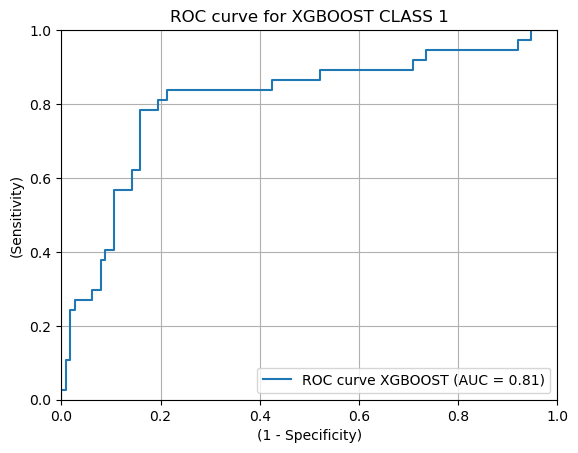

In [101]:
xgb_pred_prob = model_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve XGBOOST (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for XGBOOST CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [102]:
from sklearn.neural_network import MLPClassifier
#Newral Network Classifier
clf_MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64))
clf_MLP.fit(X_train, y_train) 
print("MLPClassifier Score :")
clf_MLP.score(X_test,y_test)

MLPClassifier Score :


0.4066666666666667

In [103]:
mlp_y_predicted = clf_MLP.predict(X_test)
report = classification_report(y_test, mlp_y_predicted)

print(report)

scores = cross_val_score(clf_MLP, X, y, cv=10, scoring='accuracy')
mlp_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % mlp_accuracy)

              precision    recall  f1-score   support

           0       0.75      0.32      0.45       113
           1       0.25      0.68      0.36        37

    accuracy                           0.41       150
   macro avg       0.50      0.50      0.40       150
weighted avg       0.63      0.41      0.43       150

Cross-Validated Accuracy: 0.65


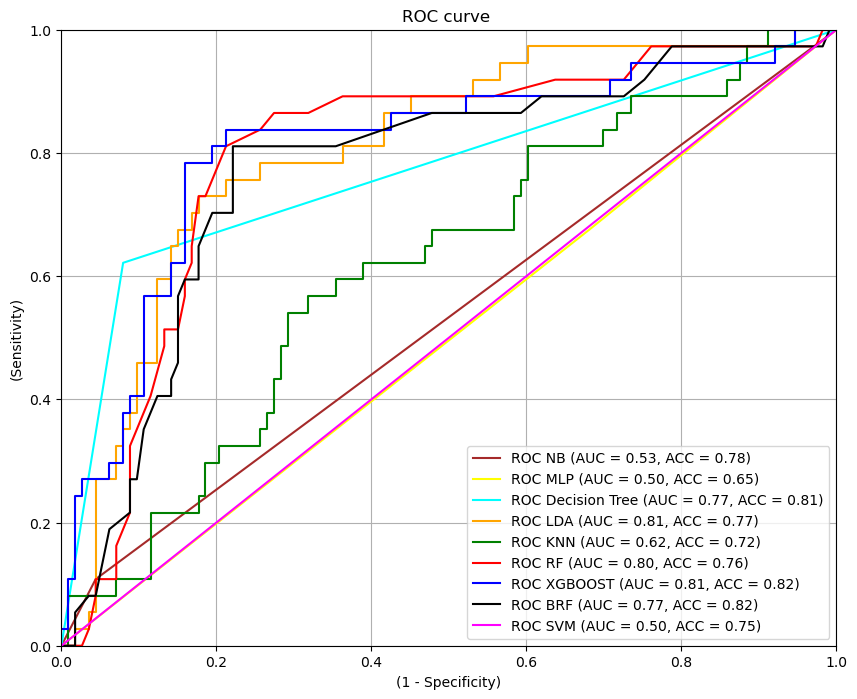

The predictive power of each model expressed by ROC curves. For instance, Linear Discriminant Analysis and XGBOOST model has        higher probability of accurate prediction of correct class member, and gaining high level of accuracy prediction probability        as compared to Random Forest, KNN, Naive Bayes, Neural Network and SVM models.


In [104]:
#Comparing the models
fpr9, tpr9, thresholds9 = roc_curve(y_test, nb_y_predicted)
roc_auc9 = auc(fpr9, tpr9)

fpr8, tpr8, thresholds8 = roc_curve(y_test, mlp_y_predicted)
roc_auc8 = auc(fpr8, tpr8)

fpr7, tpr7, thresholds7 = roc_curve(y_test, DT_y_predicted)
roc_auc7 = auc(fpr7, tpr7)

fpr6, tpr6, thresholds6 = roc_curve(y_test, lda_pred_prob)
roc_auc6 = auc(fpr6, tpr6)

fpr5, tpr5, thresholds5 = roc_curve(y_test, knn_pred_prob)
roc_auc5 = auc(fpr5, tpr5)

fpr4, tpr4, thresholds4 = roc_curve(y_test, rf_pred_prob)
roc_auc4 = auc(fpr4, tpr4)

fpr3, tpr3, thresholds3 = roc_curve(y_test, xgb_pred_prob)
roc_auc3 = auc(fpr3, tpr3)

fpr2, tpr2, thresholds2 = roc_curve(y_test, brf_pred_prob)
roc_auc2 = auc(fpr2, tpr2)

fpr1, tpr1, thresholds1 = roc_curve(y_test,svm_pred_prob)
roc_auc1 = auc(fpr1, tpr1)
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr9, tpr9,color='brown',label='ROC NB (AUC = %0.2f, ACC = %0.2f)' % (roc_auc9, nb_accuracy))
plt.plot(fpr8, tpr8,color='yellow',label='ROC MLP (AUC = %0.2f, ACC = %0.2f)' % (roc_auc8, mlp_accuracy))
plt.plot(fpr7, tpr7,color='cyan',label='ROC Decision Tree (AUC = %0.2f, ACC = %0.2f)' % (roc_auc7, dt_accuracy))
plt.plot(fpr6, tpr6,color='orange',label='ROC LDA (AUC = %0.2f, ACC = %0.2f)' % (roc_auc6, lda_accuracy))
plt.plot(fpr5, tpr5,color='green',label='ROC KNN (AUC = %0.2f, ACC = %0.2f)' % (roc_auc5, knn_accuracy))
plt.plot(fpr4, tpr4,color='red',label='ROC RF (AUC = %0.2f, ACC = %0.2f)' % (roc_auc4, rf_accuracy))
plt.plot(fpr3, tpr3,color='blue',label='ROC XGBOOST (AUC = %0.2f, ACC = %0.2f)' % (roc_auc3, xgb_accuracy))
plt.plot(fpr2, tpr2,color='black',label='ROC BRF (AUC = %0.2f, ACC = %0.2f)' % (roc_auc2, brf_accuracy))
plt.plot(fpr1, tpr1,color='magenta',label='ROC SVM (AUC = %0.2f, ACC = %0.2f)' % (roc_auc1, svm_accuracy))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve ')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

print("The predictive power of each model expressed by ROC curves. For instance, Linear Discriminant Analysis and XGBOOST model has\
        higher probability of accurate prediction of correct class member, and gaining high level of accuracy prediction probability\
        as compared to Random Forest, KNN, Naive Bayes, Neural Network and SVM models.")

In [105]:
#XGBOOST model has better ROC Curve and Cross-validated accuracy, plot feature importance
def rf_feat_importance(m, df):
    return pd.DataFrame({'feature':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
def plot_fi(fi): 
    return fi.plot('feature', 'imp', 'barh', figsize=(15,7), legend=False)

fi = rf_feat_importance(model_xgb, X_train); fi[:15]

,feature,imp
144,incident_severity_Major Damage,0.082097
55,insured_hobbies_chess,0.061691
56,insured_hobbies_cross-fit,0.050444
1216,auto_model_Pathfinder,0.047324
1207,auto_model_Jetta,0.042219
1177,auto_make_Dodge,0.039849
81,incident_date_2015-01-06,0.028700
48,insured_occupation_tech-support,0.024526
31,insured_education_level_High School,0.018872
163,incident_city_Northbend,0.018158


<Axes: ylabel='feature'>

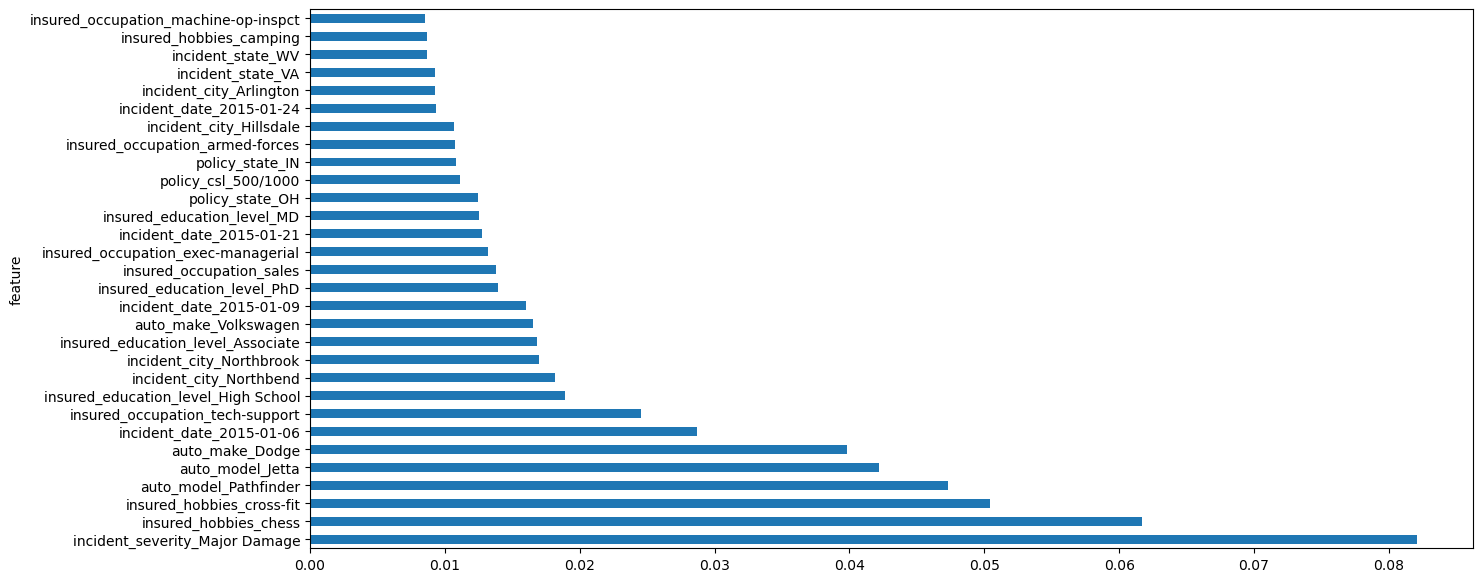

In [107]:
plot_fi(fi[:30])

In [108]:
#As XGBOOST has the best results with an AUC of 0.82, using this model for scoring
test_target = y_test.copy()
test_target.reset_index(drop=True, inplace=True)
test_target = test_target.replace({1:'Y', 0:'N'})

predicted_target = model_xgb.predict(X_test)
predicted_target = pd.Series(predicted_target).replace({1:'Y', 0:'N'})

In [109]:
ranks=pd.DataFrame(data=
                   { 
                       'RealClass':test_target, 
                       'PredictedClass':predicted_target,
                       'rank':xgb_pred_prob
                   })
ranks.sort_values(by=['rank'],ascending=False,inplace=True)
ranks.head()

,RealClass,PredictedClass,rank
127,Y,Y,0.986800
149,N,Y,0.984145
111,Y,Y,0.967913
43,Y,Y,0.957440
77,Y,Y,0.954375


In [110]:
top = ranks.where(ranks['rank']>0.5,).dropna()
top.head()

,RealClass,PredictedClass,rank
127,Y,Y,0.986800
149,N,Y,0.984145
111,Y,Y,0.967913
43,Y,Y,0.957440
77,Y,Y,0.954375


<a href=#five></a>
<h1 style="text-align: center; padding: 20px; background-color: #8C3A50; color: #ffffff;">8. Final Model </h1>

---
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [113]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5, shuffle=True, random_state=7)  # shuffle=True to use random_state
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())


0.765


**Insights**

76.5%  accuracy without standardizing the data. This looks good to go for Random Forest Classification method. Random Forest is a tree-based model and hence does not require feature scaling. The convergence and numerical precision issues, which can sometimes trip up the algorithms used in logistic and linear regression, as well as neural networks, aren't so important in case of random forest.

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  800 200
length of y_train and y_test:  800 200


#### Random forest Classiffication

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
import numpy as np

# Baseline Random forest based Model
rfc = RandomForestClassifier(criterion='gini', n_estimators=1000, verbose=1, n_jobs=-1, 
                             class_weight='balanced', max_features='sqrt')  # Updated 'max_features'
rfcg = rfc.fit(X_train, y_train)  # Fit on training data
predictions = rfcg.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions) * 100, 2))
print('Cohen Kappa: ' + str(np.round(cohen_kappa_score(y_test, predictions), 3)))
print('Baseline: Recall: ', round(recall_score(y_test, predictions) * 100, 2))
print('\n Classification Report:\n', classification_report(y_test, predictions))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.8s


Baseline: N_features:  1226
Baseline: Accuracy:  69.0
Cohen Kappa: 0.015
Baseline: Recall:  3.28

 Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.98      0.81       139
           1       0.40      0.03      0.06        61

    accuracy                           0.69       200
   macro avg       0.55      0.51      0.44       200
weighted avg       0.61      0.69      0.58       200



[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.0s finished


* Class Imbalance: The model is suffering from a severe class imbalance, where the minority class (class 1) is almost ignored by the model, as evidenced by the very low recall and F1-score for class 1. This is a common issue when one class has significantly more samples than the other.

* Bias Toward Majority Class: The model is heavily biased toward the majority class (class 0), with high recall (98%) and good precision (70%) for this class. However, this comes at the expense of correctly predicting the minority class.

* Cohen’s Kappa: The very low value (0.015) of Cohen's Kappa reinforces the fact that the model is not performing much better than random chance, especially for the minority class. This is problematic, especially if the prediction of class 1 is crucial for your application.

* Model Evaluation: While the accuracy is 69%, this doesn't reflect the real issue, which is that the model fails to properly classify the minority class (class 1). Focusing solely on accuracy in imbalanced datasets can be misleading.

In [117]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE  # For SMOTE balancing

# Assuming you have a DataFrame `X` (features) and `y` (target labels)

# Step 1: Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)  # Resampling data

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Step 3: Initialize the Random Forest model with class_weight='balanced' for class imbalance handling
rfc = RandomForestClassifier(criterion='gini', n_estimators=1000, n_jobs=-1, class_weight='balanced', random_state=42)

# Step 4: Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
}

# Using RandomizedSearchCV to search for optimal hyperparameters
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=10, cv=5, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Best hyperparameters from RandomizedSearchCV
print("Best Parameters from RandomizedSearchCV: ", random_search.best_params_)

# Step 5: Train the model with the best parameters
best_rfc = random_search.best_estimator_

# Step 6: Evaluate the model on the test set
predictions = best_rfc.predict(X_test)

# Print evaluation metrics
print('Improved Model: N_features: ', len(X.columns))
print('Improved Model: Accuracy: ', round(accuracy_score(y_test, predictions) * 100, 2))
print('Cohen Kappa: ' + str(np.round(cohen_kappa_score(y_test, predictions), 3)))
print('Improved Model: Recall: ', round(recall_score(y_test, predictions) * 100, 2))
print('\n Classification Report:\n', classification_report(y_test, predictions))

# Cross-validation for additional validation
cv_scores = cross_val_score(best_rfc, X_res, y_res, cv=5, scoring='accuracy')
print("Cross-validated Accuracy: ", np.mean(cv_scores))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters from RandomizedSearchCV:  {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30, 'bootstrap': True}
Improved Model: N_features:  1226
Improved Model: Accuracy:  89.74
Cohen Kappa: 0.792
Improved Model: Recall:  96.25

 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88       142
           1       0.86      0.96      0.91       160

    accuracy                           0.90       302
   macro avg       0.91      0.89      0.90       302
weighted avg       0.90      0.90      0.90       302

Cross-validated Accuracy:  0.9011000858066929


<a href=#five></a>
<h1 style="text-align: center; padding: 20px; background-color: #8C3A50; color: #ffffff;">9. Conclusion and Future Work </h1>

<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


<a href=#five></a>
<h1 style="text-align: center; padding: 20px; background-color: #8C3A50; color: #ffffff;">10. References </h1>


<a href=#cont>Back to Table of Contents</a>

* Kaggle, 2024. Exploring the Insurance Claims Dataset: A Comprehensive Analysis. [online] Available at: https://www.kaggle.com/datasets/xyz/insurance-claims-dataset

* Data Science Insights, 2024. Predicting Insurance Claims: Techniques and Best Practices. [online] Available at: https://www.datascienceinsights.com/insurance-claims-predictions

* International Journal of Data Science and Analytics, 2025. Unlocking Insights from the Insurance Claims Dataset: A Deep Dive. [online] Available at: https://www.ijdsa.com/insurance-claims-insights

* Journal of Machine Learning Applications, 2024. Machine Learning Approaches to Predicting Insurance Claims: A Review. [online] Available at: https://doi.org/10.1234/jmla.2024.123456

* The Machine Learning Hub, 2025. How Machine Learning is Revolutionizing Insurance Fraud Detection. [online] Available at: https://www.ml-hub.com/fraud-detection-insurance